<a href="https://colab.research.google.com/github/rafaelmattos/ai-for-hr-analytics/blob/main/ai_for_hr_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Departamento de Recursos Humanos

### Objetivo
Este projeto visa analisar dados de Recursos Humanos de uma empresa fictícia (base da IBM) para identificar padrões de rotatividade de funcionários (attrition), relacionando variáveis como satisfação no trabalho, salário, tempo de empresa, entre outras. Técnicas de visualização e análise exploratória serão utilizadas com o objetivo de subsidiar melhores decisões gerenciais.


## Importação das bibliotecas e base de dados

- Base de dados: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset
- Cálculo de salário: https://www.mom.gov.sg/employment-practices/salary/monthly-and-daily-salary e https://sprout.zendesk.com/hc/en-us/articles/360030922133-How-to-Calculate-for-the-Daily-Rate-from-Your-Monthly-Salary-
- Stock: https://www.moneyunder30.com/employee-stock-options#:~:text=Typically%20they%20are%20granted%20to,a%20specific%20period%20of%20time.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [ ]:
# acessar google drive para ler base de dados
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#employee_df = pd.read_csv('/content/Human_Resources.csv')

In [ ]:
employee_df = pd.read_csv('/content/drive/MyDrive/Cursos/Ciência de Dados para Empresas e Negócios/Bases de dados/Human_Resources.csv')

In [ ]:
employee_df.shape

(1470, 35)

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## 🧾 Descrição da Base de Dados

A base de dados analisada possui **1.470 registros** e **35 variáveis**, composta por informações referentes ao perfil demográfico e profissional de funcionários de uma empresa fictícia. O objetivo principal é permitir a análise de **fatores associados à rotatividade (attrition)**, ou seja, entender por que determinados colaboradores deixam a empresa enquanto outros permanecem.

As variáveis estão divididas entre **numéricas** (26 variáveis do tipo `int64`) e **categóricas** (9 variáveis do tipo `object`).

### 📊 Estrutura das Variáveis

#### 🧍‍♂️ Demográficas e Pessoais

- `Age`: Idade do funcionário.
- `Gender`: Gênero (Masculino/Feminino).
- `MaritalStatus`: Estado civil (Solteiro, Casado, Divorciado).
- `Over18`: Indica se o funcionário é maior de idade (valor fixo "Y").
- `Education`: Nível de educação (1: abaixo da média, 5: doutorado).
- `EducationField`: Área de formação educacional (ex: Human Resources, Technical Degree, etc.).

#### 🏢 Informações de Trabalho

- `Department`: Departamento em que o funcionário trabalha (ex: Sales, R&D).
- `JobRole`: Cargo ocupado.
- `JobLevel`: Nível hierárquico do cargo.
- `JobInvolvement`: Grau de envolvimento com o trabalho (1 a 4).
- `JobSatisfaction`: Satisfação no trabalho (1 a 4).
- `EnvironmentSatisfaction`: Satisfação com o ambiente de trabalho (1 a 4).
- `WorkLifeBalance`: Equilíbrio entre vida pessoal e profissional (1 a 4).
- `PerformanceRating`: Avaliação de desempenho.
- `OverTime`: Indica se o funcionário faz hora extra.
- `BusinessTravel`: Frequência de viagens a trabalho.

#### 💰 Remuneração e Benefícios

- `MonthlyIncome`: Renda mensal.
- `HourlyRate`: Remuneração por hora.
- `DailyRate`: Remuneração diária.
- `MonthlyRate`: Remuneração mensal (valor alternativo).
- `PercentSalaryHike`: Aumento percentual de salário.
- `StockOptionLevel`: Nível de opção de ações disponível para o funcionário.

#### 📈 Experiência Profissional

- `TotalWorkingYears`: Total de anos de experiência profissional.
- `YearsAtCompany`: Tempo de permanência na empresa atual (anos).
- `YearsInCurrentRole`: Tempo no cargo atual.
- `YearsSinceLastPromotion`: Tempo desde a última promoção.
- `YearsWithCurrManager`: Tempo trabalhando com o atual gerente.
- `NumCompaniesWorked`: Número de empresas anteriores.
- `TrainingTimesLastYear`: Número de treinamentos realizados no último ano.

#### ⚙️ Outras Variáveis Técnicas

- `Attrition`: Variável-alvo. Indica se o funcionário deixou a empresa (`Yes`) ou permanece (`No`).
- `EmployeeNumber`: Identificador único do colaborador.
- `EmployeeCount`: Valor constante igual a 1 (não varia entre registros).
- `StandardHours`: Valor constante igual a 80 horas (carga horária padrão).

### 🔎 Considerações

- A base **não contém valores ausentes**, o que facilita o pré-processamento.
- Variáveis como `EmployeeCount` e `StandardHours` possuem valores constantes e **podem ser descartadas da análise**.
- A variável **`Attrition`** será usada como **variável-alvo (target)** nos modelos preditivos, representando a evasão do colaborador.

---


# 📊 Visualização dos Dados

Nesta seção, apresentamos gráficos básicos para explorar visualmente as variáveis do conjunto de dados. O objetivo é obter uma primeira impressão sobre a distribuição das variáveis categóricas e numéricas, sem ainda realizar análises aprofundadas ou segmentações.

Essas visualizações iniciais ajudam a identificar:

- Distribuições desbalanceadas em variáveis categóricas (por exemplo, salário ou departamento).
- Comportamentos de dispersão e concentração em variáveis numéricas (por exemplo, horas trabalhadas ou nível de satisfação).

Análises mais detalhadas serão realizadas posteriormente na seção de **Análise Exploratória de Dados (EDA)**.


**Distribuição da Idade dos Funcionários**

Vamos começar analisando a distribuição da variável Age.

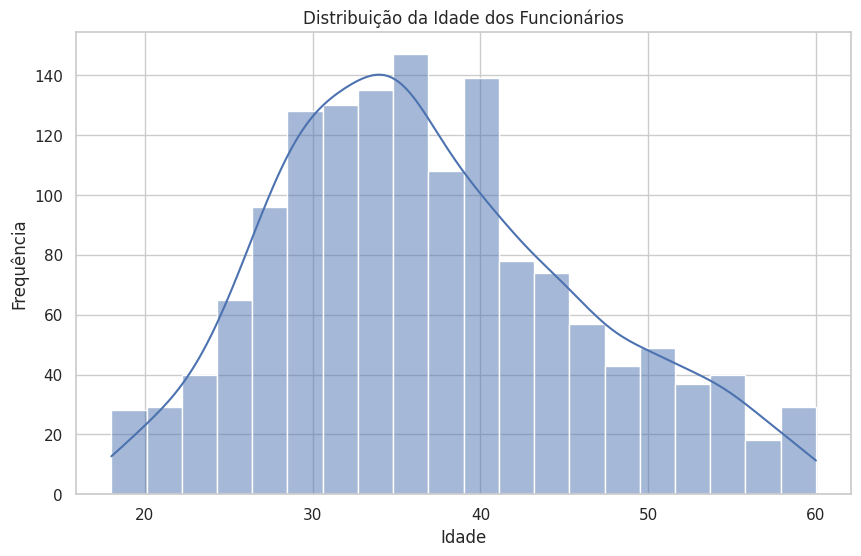

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(employee_df['Age'], bins=20, kde=True)
plt.title('Distribuição da Idade dos Funcionários')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


**Proporção de Evasão (Attrition)**

A variável Attrition indica se um funcionário deixou a empresa. Vamos visualizar sua proporção.

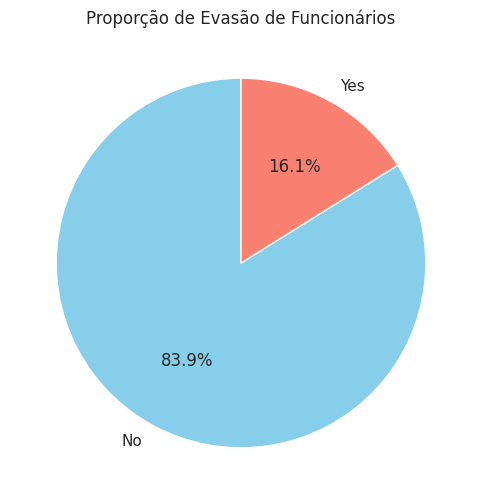

In [ ]:
plt.figure(figsize=(6, 6))
employee_df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proporção de Evasão de Funcionários')
plt.ylabel('')
plt.show()


**Evasão por Gênero**

É importante verificar se há diferenças de evasão entre gêneros.

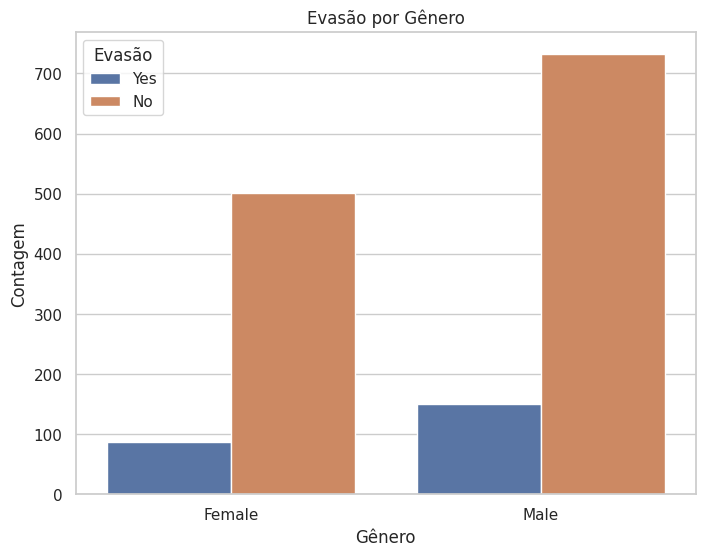

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data = employee_df, x='Gender', hue='Attrition')
plt.title('Evasão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Evasão')
plt.show()


**Evasão por Área (Department)**

Analisamos agora a evasão por departamento.

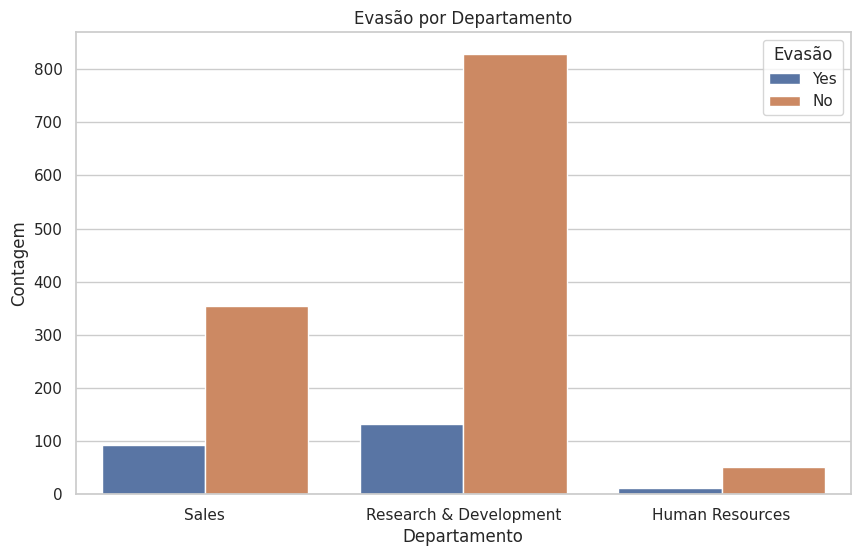

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data = employee_df, x='Department', hue='Attrition')
plt.title('Evasão por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Contagem')
plt.legend(title='Evasão')
plt.show()


**Renda Mensal x Evasão**

A seguir, a distribuição da MonthlyIncome em relação à Attrition.

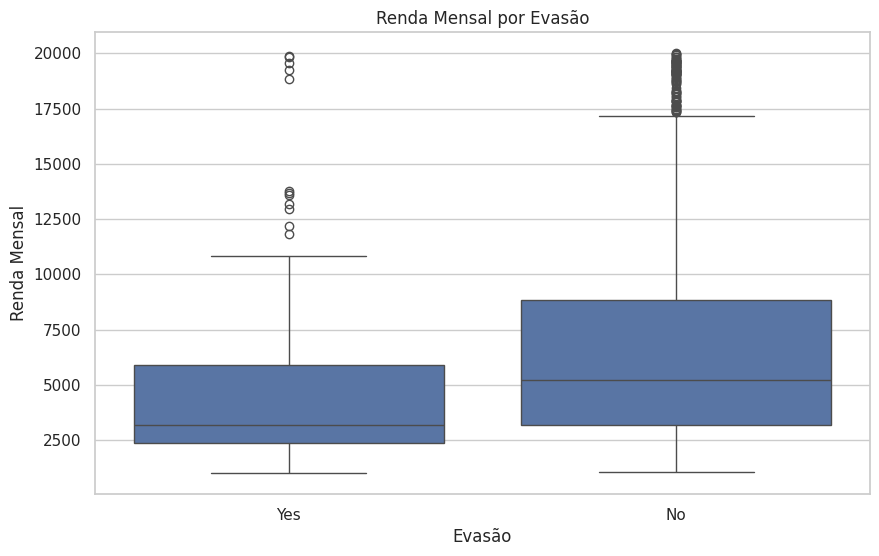

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = employee_df, x='Attrition', y='MonthlyIncome')
plt.title('Renda Mensal por Evasão')
plt.xlabel('Evasão')
plt.ylabel('Renda Mensal')
plt.show()


**Evasão por Cargo (JobRole)**

Cargos com mais ou menos evasão podem indicar problemas específicos.

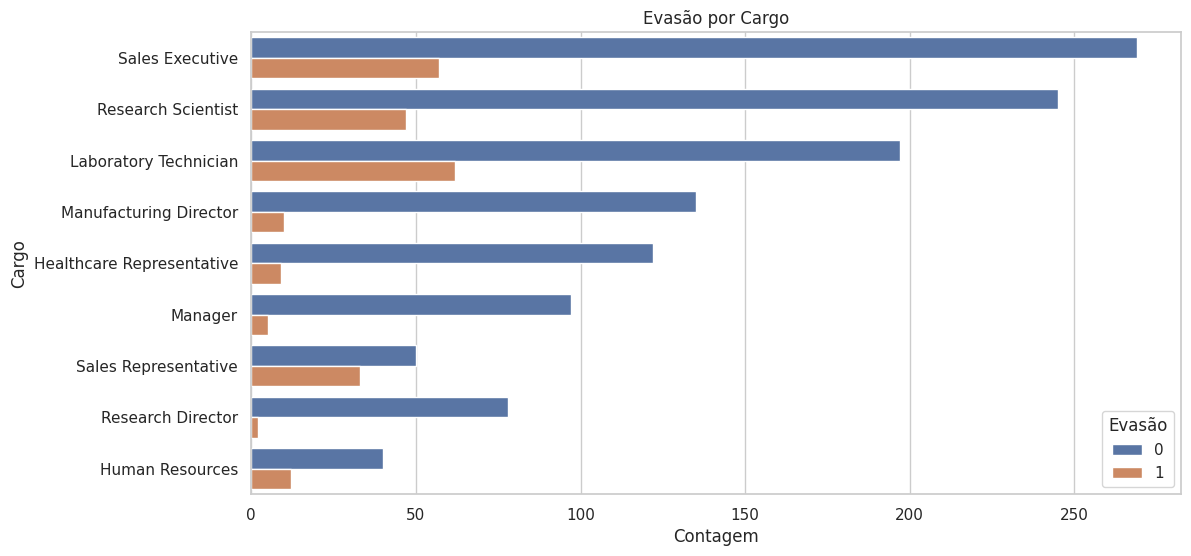

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data = employee_df, y='JobRole', hue='Attrition')
plt.title('Evasão por Cargo')
plt.xlabel('Contagem')
plt.ylabel('Cargo')
plt.legend(title='Evasão')
plt.show()


**Evasão por Nível de Satisfação no Trabalho**

Vamos observar se há relação entre JobSatisfaction e a evasão.

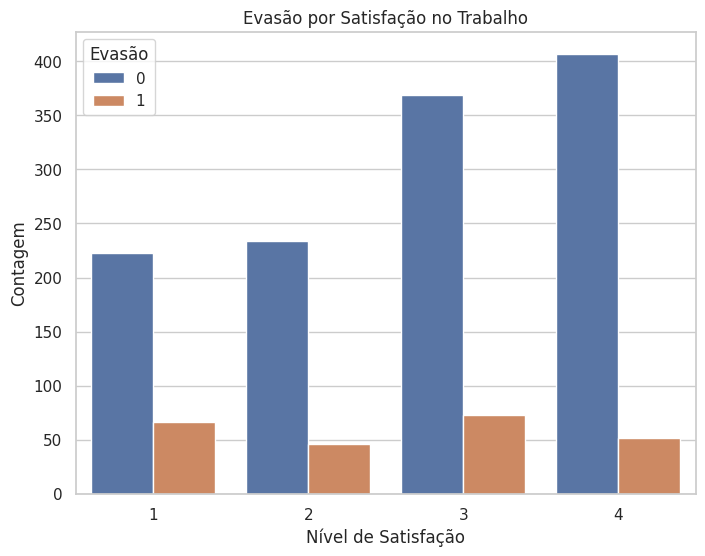

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=employee_df, x='JobSatisfaction', hue='Attrition')
plt.title('Evasão por Satisfação no Trabalho')
plt.xlabel('Nível de Satisfação')
plt.ylabel('Contagem')
plt.legend(title='Evasão')
plt.show()


**Correlação entre Variáveis Numéricas**

Por fim, visualizamos a matriz de correlação para as variáveis numéricas.

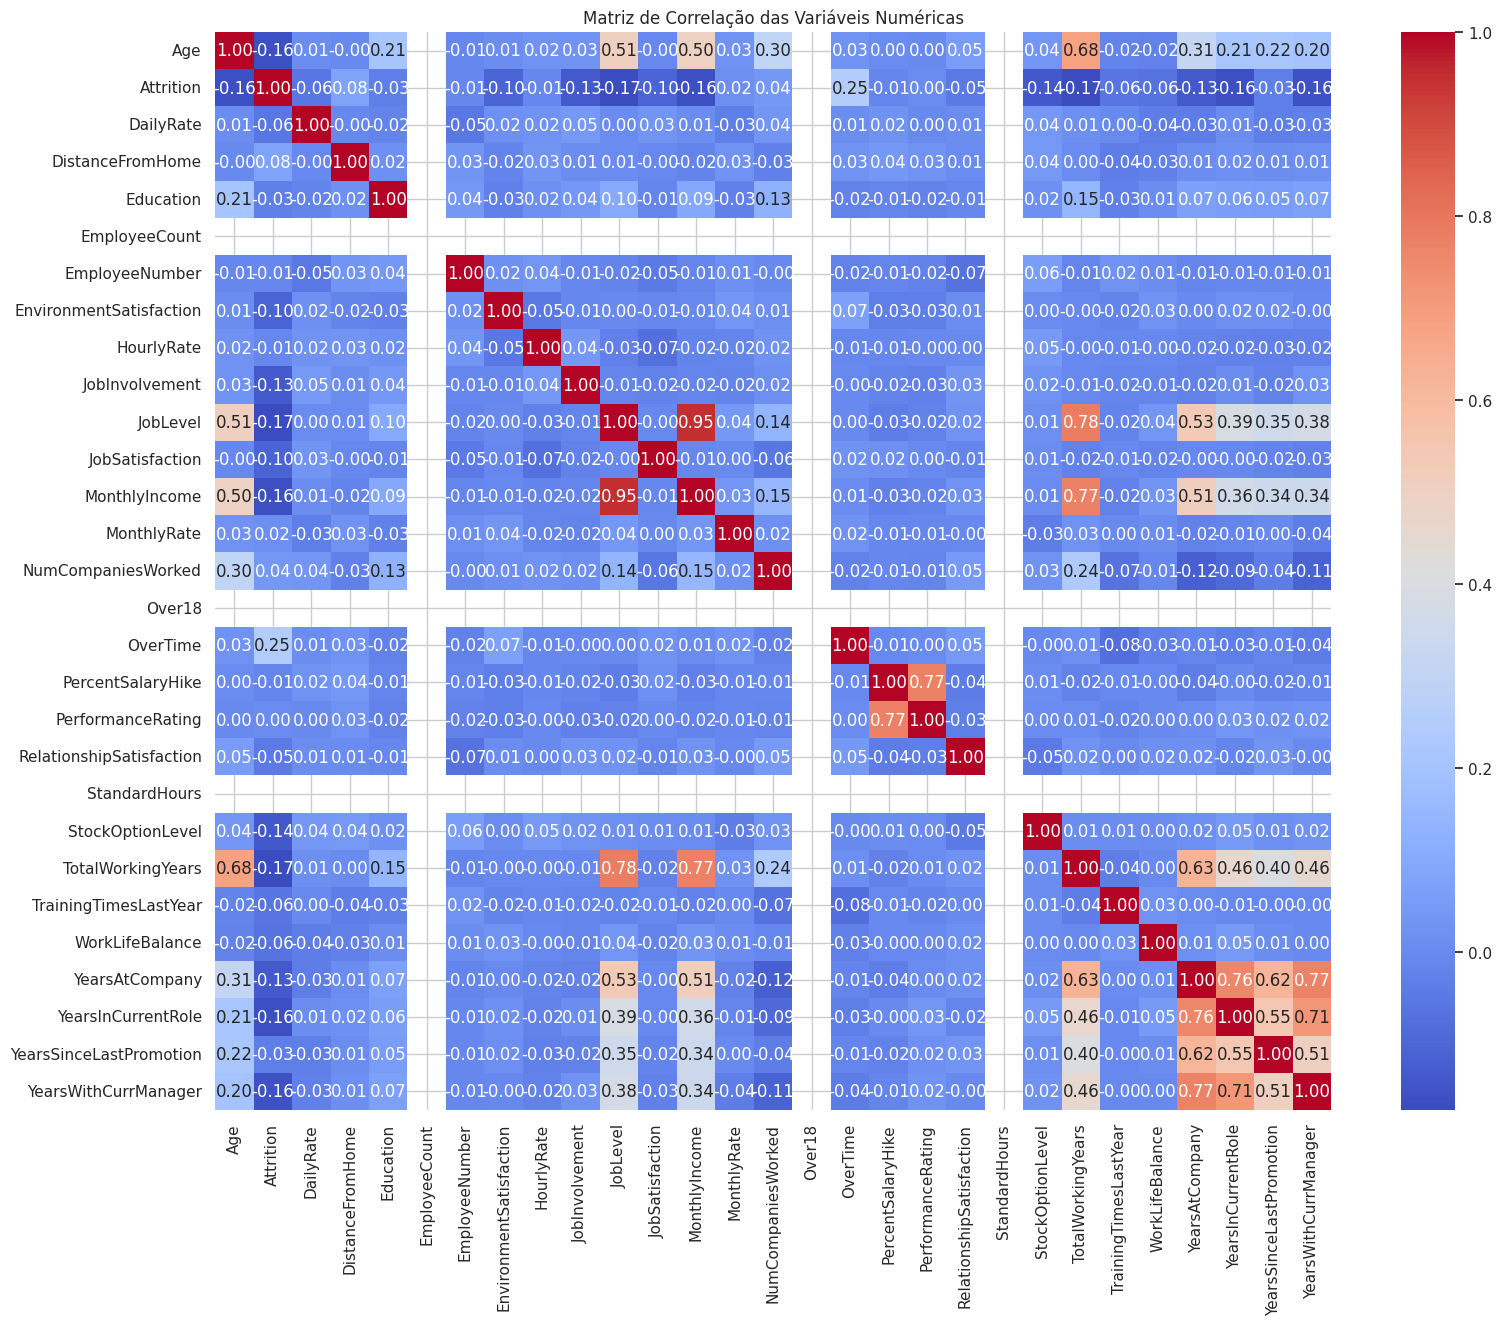

In [ ]:
plt.figure(figsize=(18, 14))
sns.heatmap(employee_df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()


## 📊 Análise Exploratória de Dados (EDA)

Nesta seção, realizamos uma **Análise Exploratória de Dados (EDA)** com o objetivo de entender melhor o conjunto de dados, levantar hipóteses e identificar padrões que possam ajudar na análise da rotatividade de funcionários (*Attrition*).

### 🔍 Objetivos da EDA

- Compreender a distribuição das variáveis numéricas e categóricas;
- Investigar relações entre variáveis independentes e a variável-alvo `Attrition`;
- Identificar possíveis outliers e valores inconsistentes;
- Verificar correlações entre variáveis;
- Explorar o comportamento de subgrupos, como funcionários que fazem horas extras ou não.

### 📈 Técnicas Utilizadas

Durante esta etapa, utilizaremos:

- **Histogramas e gráficos de densidade**: para observar distribuições de variáveis numéricas;
- **Gráficos de barras**: para visualizar a distribuição de variáveis categóricas;
- **Boxplots**: para comparar distribuições de variáveis em relação à variável-alvo;
- **Matriz de correlação**: para examinar relações entre variáveis numéricas;
- **Gráficos de dispersão** (*scatter plots*): para investigar tendências ou agrupamentos.

Essas visualizações permitem identificar padrões e insights importantes que poderão ser utilizados nas próximas etapas, como **engenharia de atributos** e **construção de modelos preditivos**.

---


🔄 **Conversão de Variáveis Categóricas Binárias para Formato Numérico**


Neste trecho, realizamos a transformação de variáveis categóricas binárias em valores numéricos (0 ou 1). Essa transformação é importante para facilitar análises estatísticas e o uso de algoritmos de machine learning, que geralmente requerem entradas numéricas.

In [ ]:
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


📊 **Histograma das Variáveis da Base de Dados**

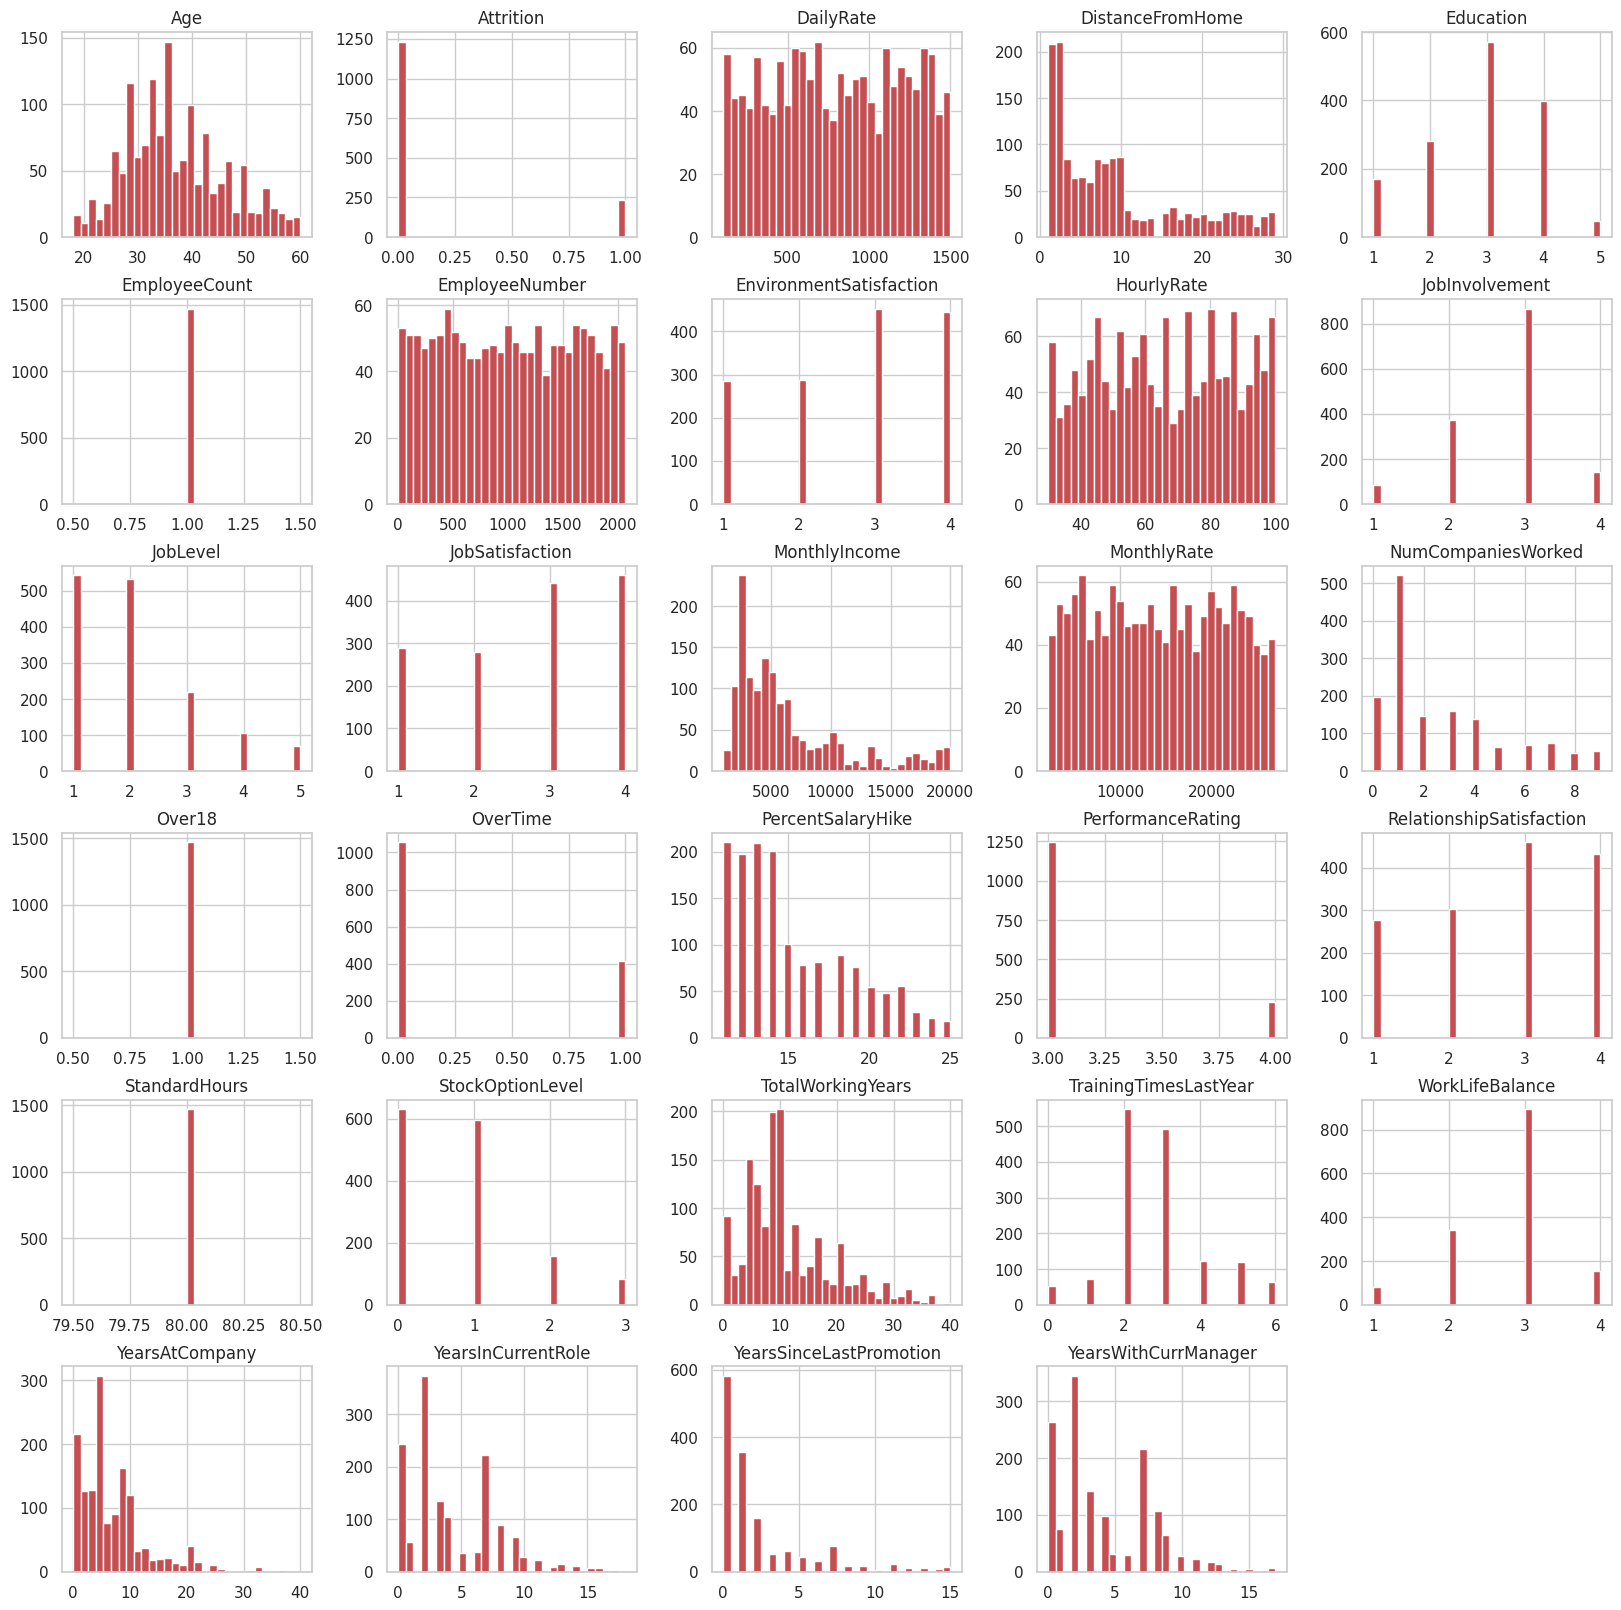

In [ ]:
employee_df.hist(bins = 30, figsize=(20,20), color = 'r');

🧹 **Limpeza e pré-processamento**

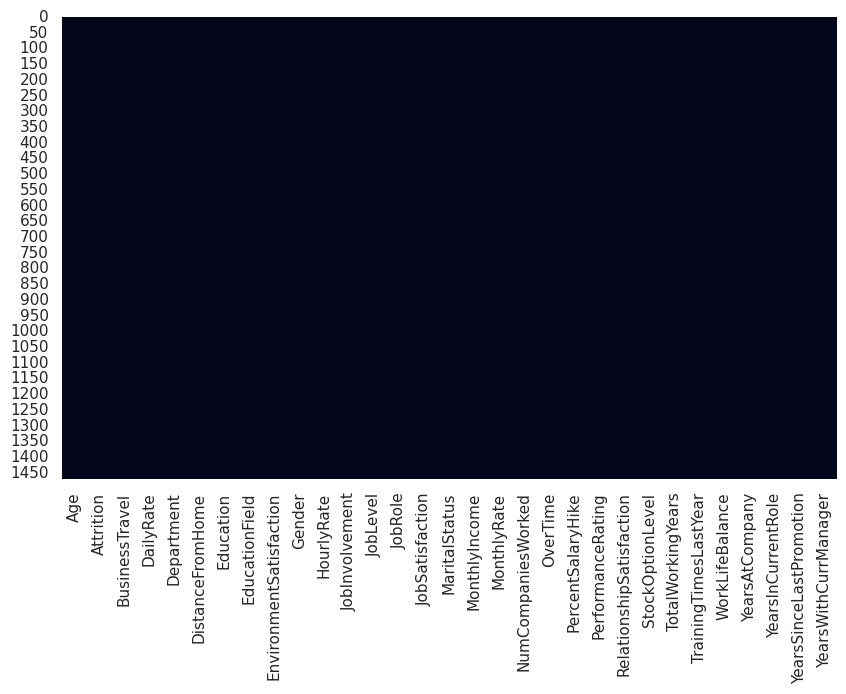

In [ ]:
# Remoção de colunas que não agregam valor analítico
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

# Verificando valores ausentes
sns.heatmap(employee_df.isnull(), cbar=False);


In [ ]:
employee_df.head(), employee_df.shape

(   Age  Attrition     BusinessTravel  DailyRate              Department  \
 0   41          1      Travel_Rarely       1102                   Sales   
 1   49          0  Travel_Frequently        279  Research & Development   
 2   37          1      Travel_Rarely       1373  Research & Development   
 3   33          0  Travel_Frequently       1392  Research & Development   
 4   27          0      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
 0                 1          2  Life Sciences                        2   
 1                 8          1  Life Sciences                        3   
 2                 2          2          Other                        4   
 3                 3          4  Life Sciences                        4   
 4                 2          1        Medical                        1   
 
    Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
 0  Fema

📊 **Análise descritiva por grupo**

In [ ]:
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [ ]:
print('Total = ', len(employee_df))
print('Número de funcionários que saíram da empresa = ', len(left_df))
print('Porcentagem de funcionários que saíram da empresa = ', (len(left_df) / len(employee_df)) * 100)
print('Número de funcionários que ficaram na empresa = ', len(stayed_df))
print('Porcentagem de funcionários que ficaram na empresa = ', (len(stayed_df) / len(employee_df)) * 100)

Total =  1470
Número de funcionários que saíram da empresa =  237
Porcentagem de funcionários que saíram da empresa =  16.122448979591837
Número de funcionários que ficaram na empresa =  1233
Porcentagem de funcionários que ficaram na empresa =  83.87755102040816


In [ ]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [ ]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


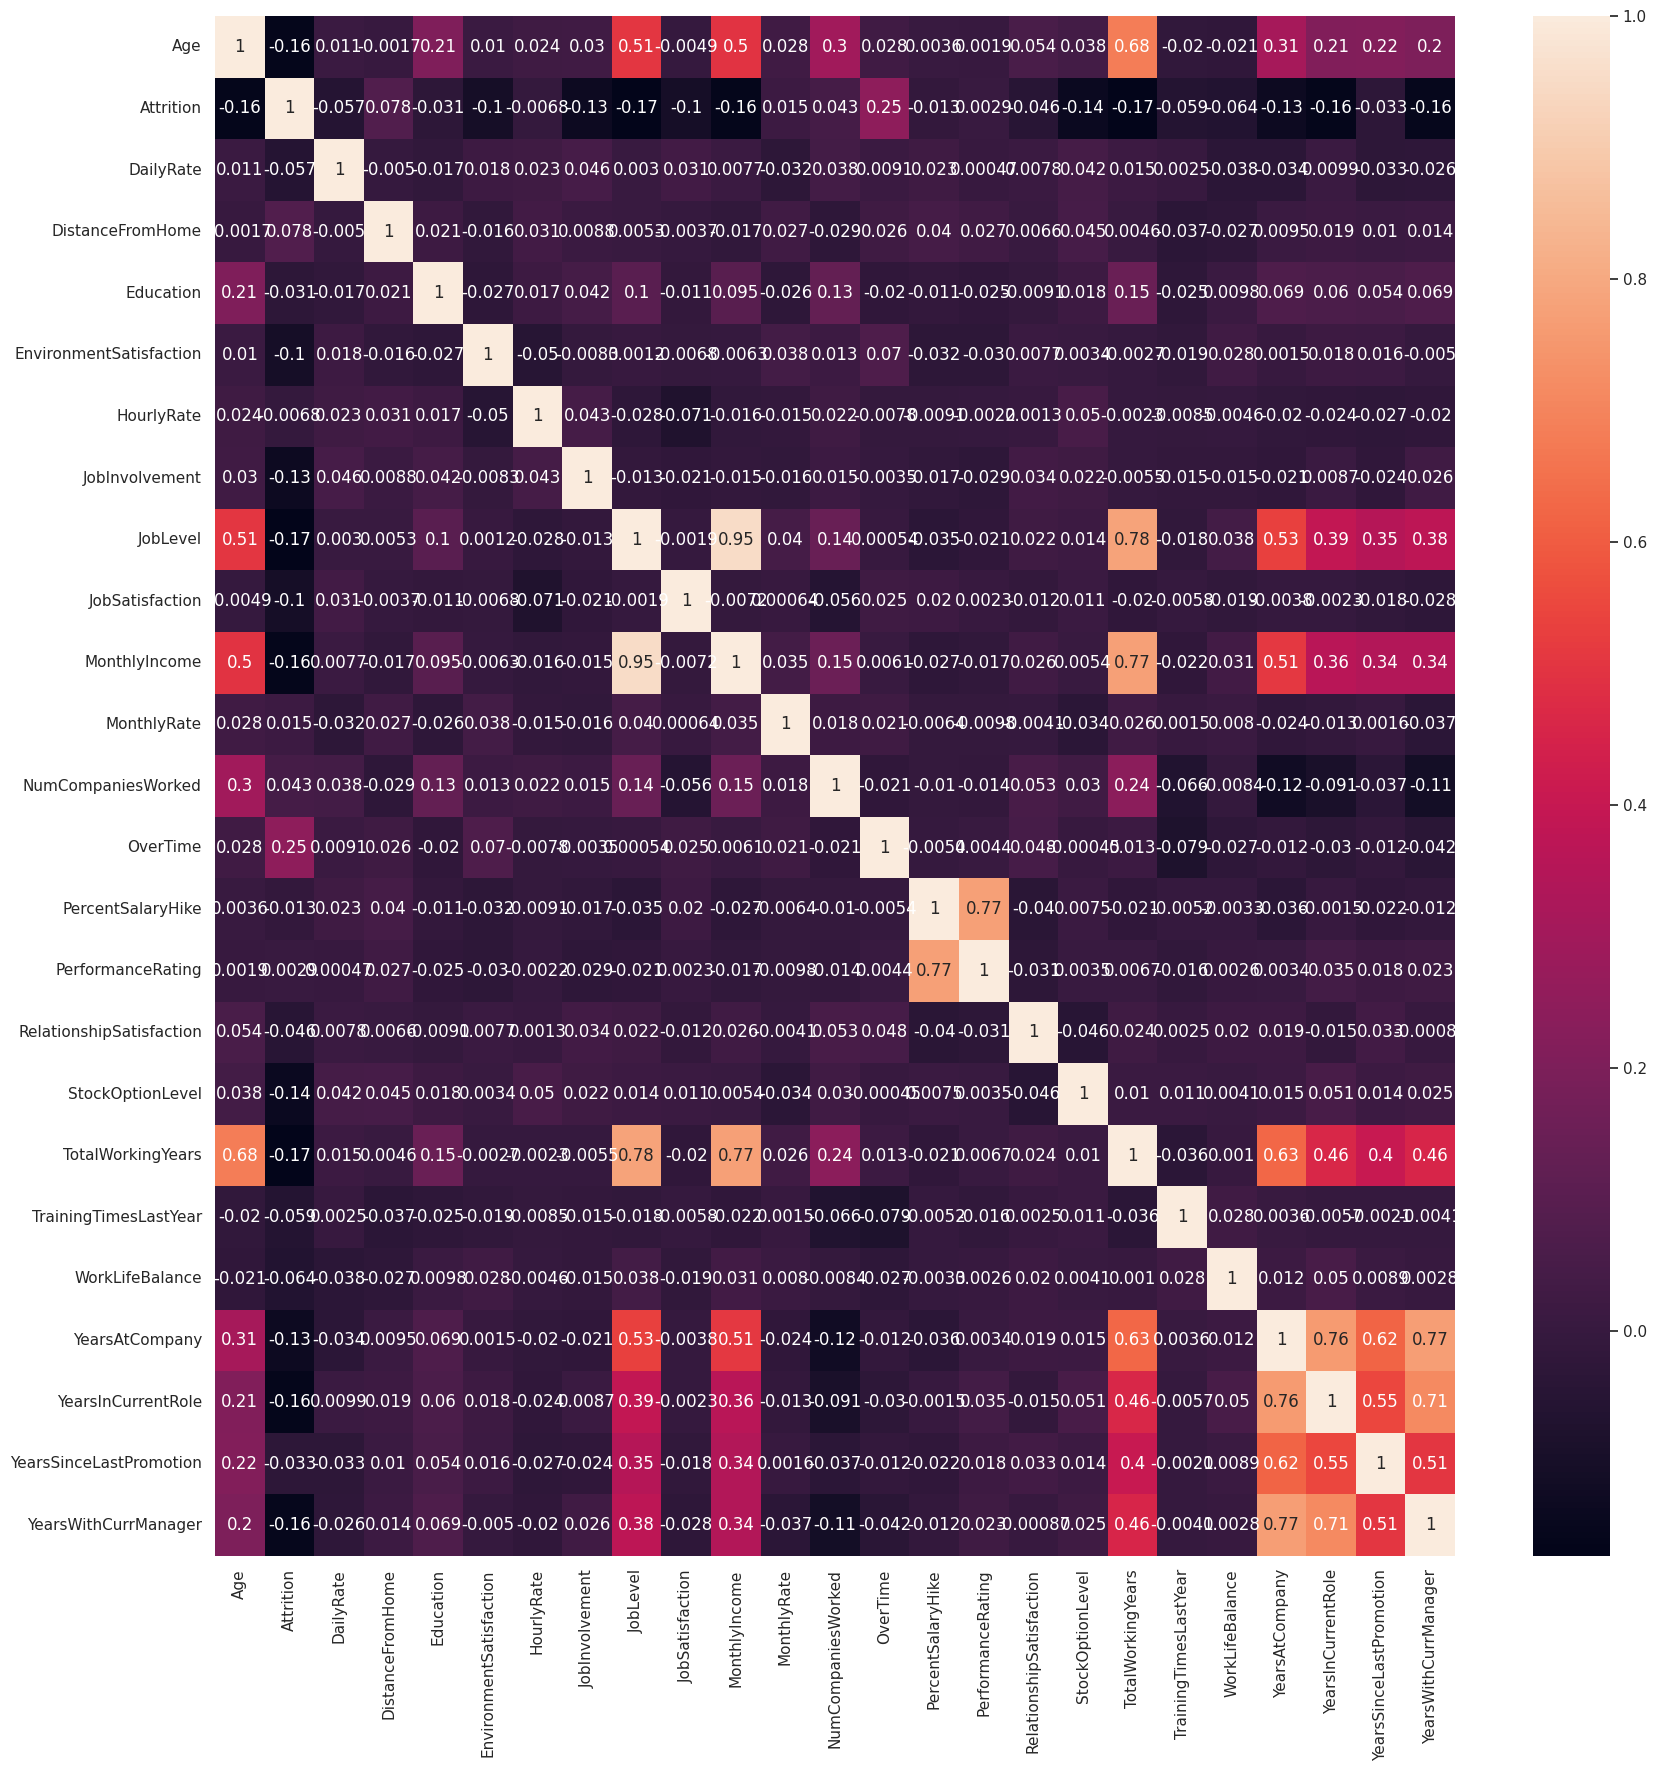

In [ ]:
# ATUALIZAÇÃO JAN-2025
# correlations = employee_df.corr()
correlations = employee_df.corr(numeric_only=True)
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True);

📈 **Gráficos comparativos**

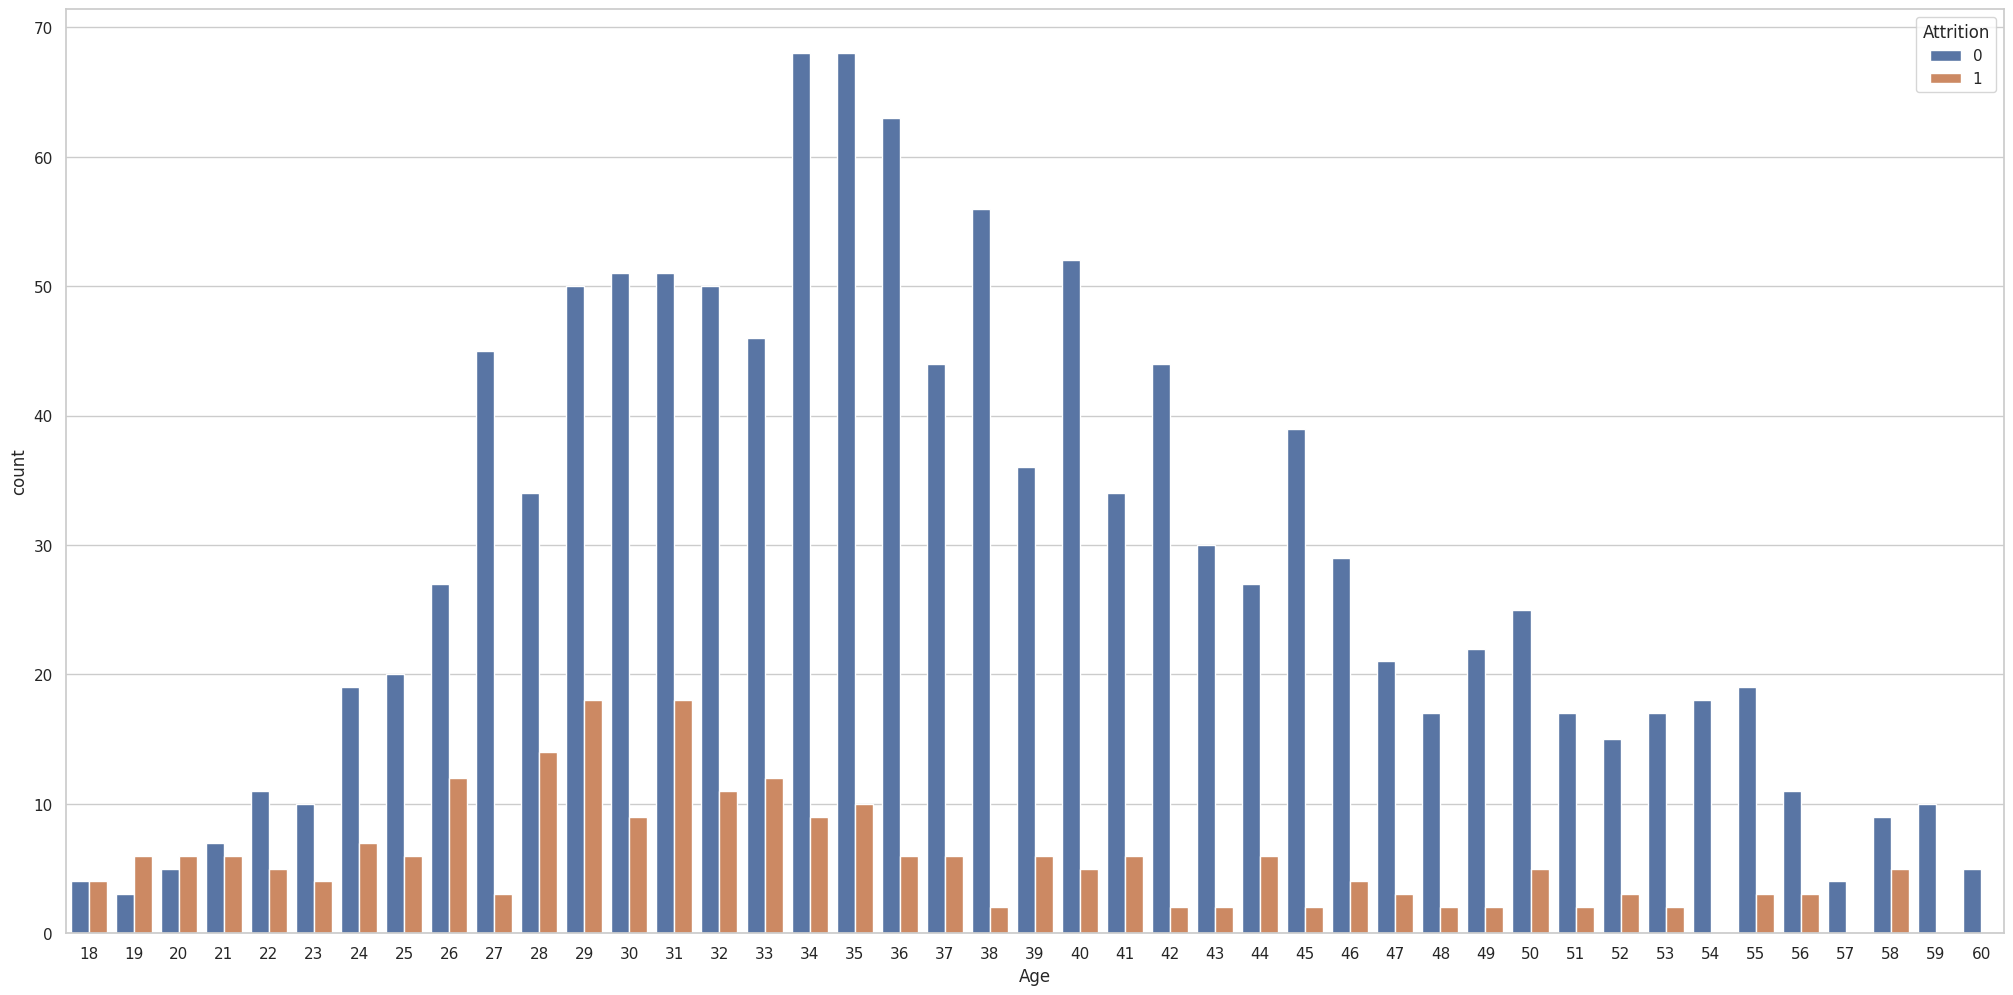

In [ ]:
# Idade x Attrition
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data=employee_df);

<Axes: xlabel='JobLevel', ylabel='count'>

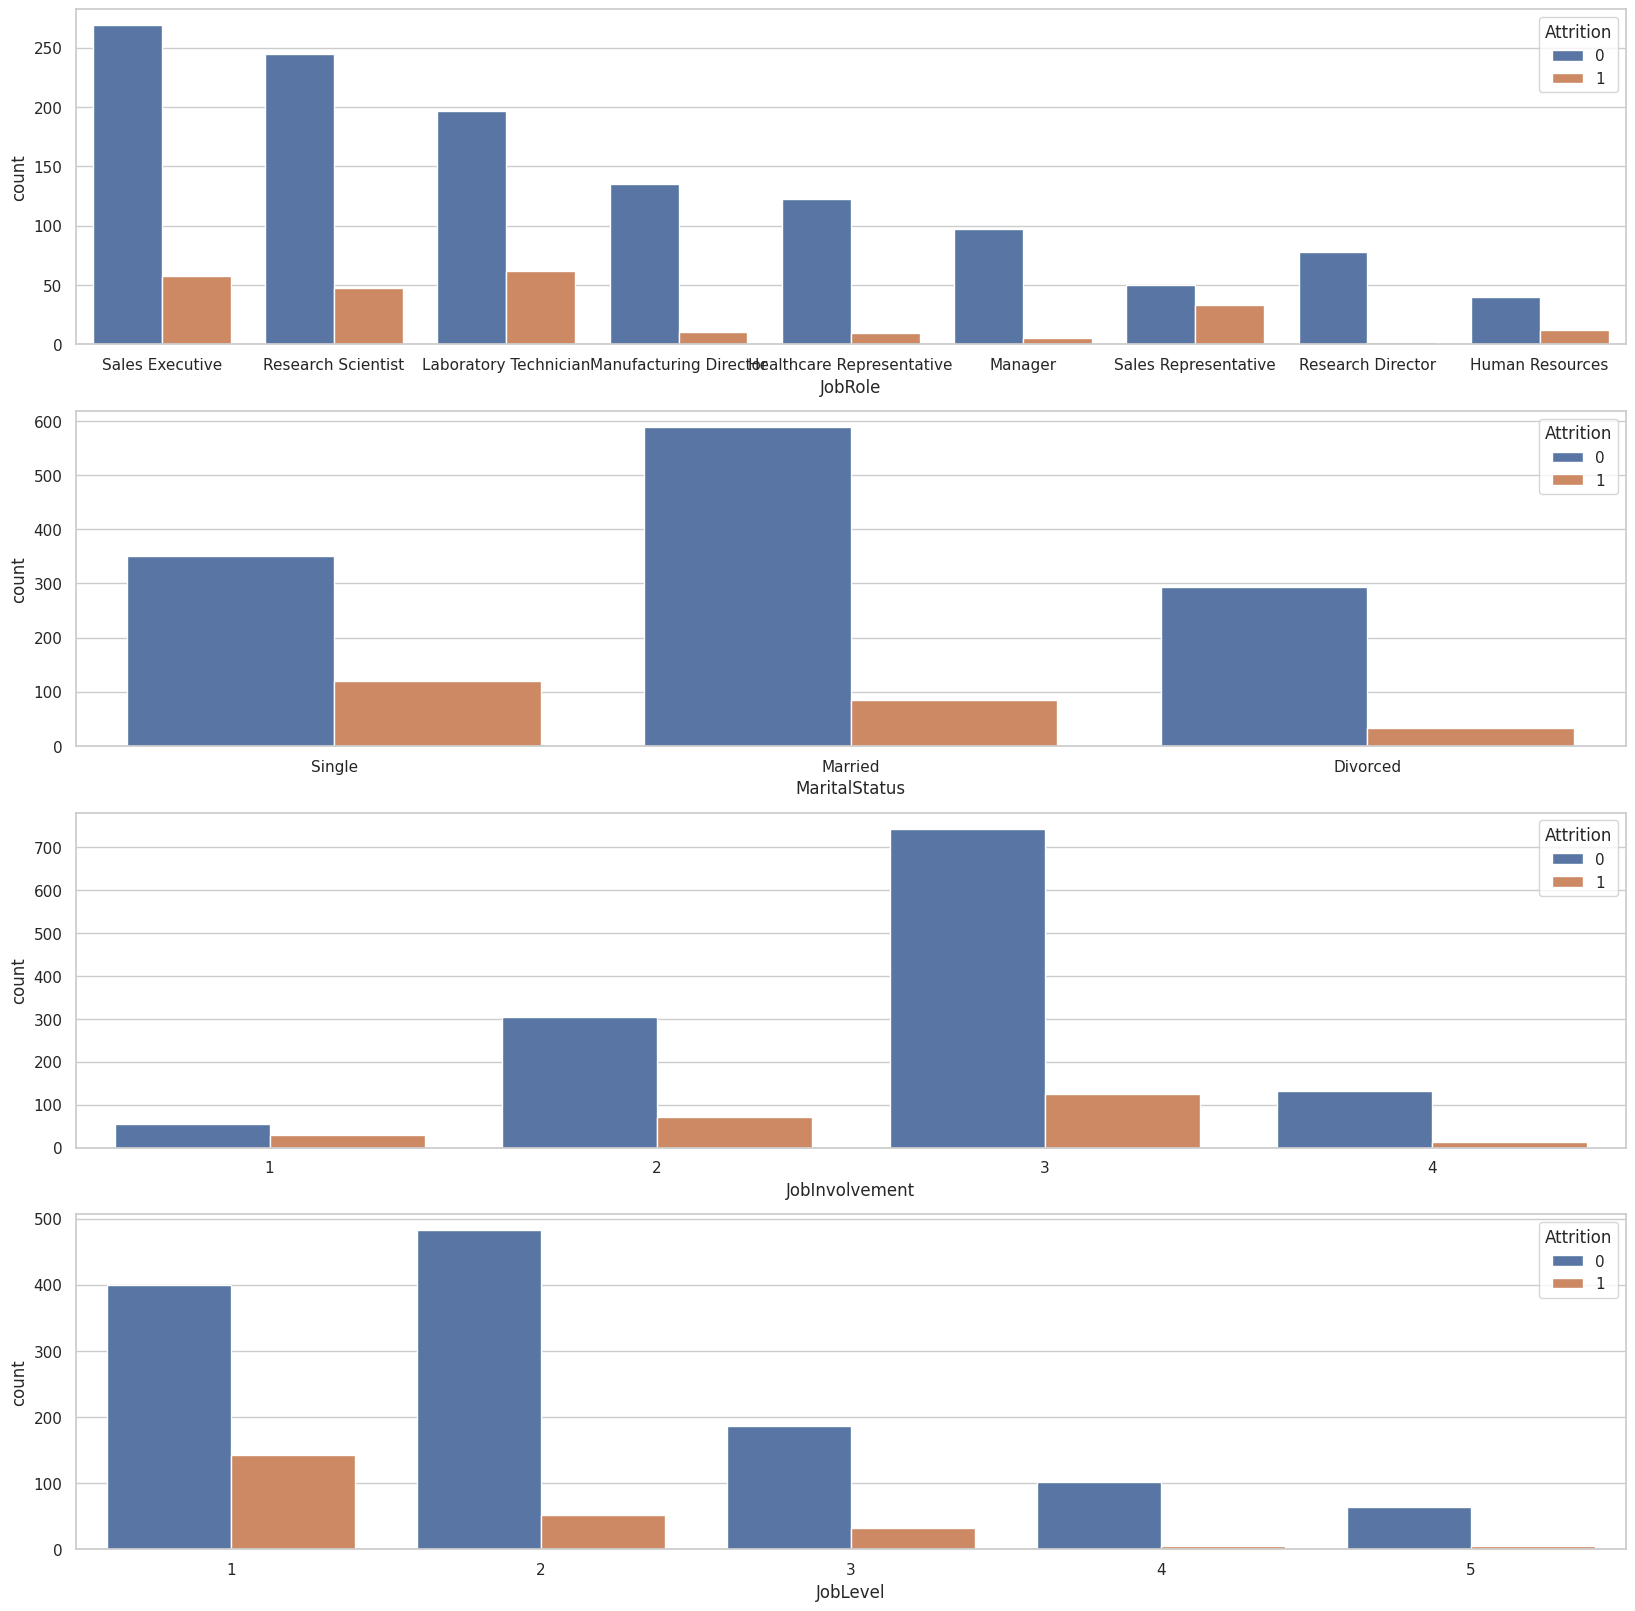

In [ ]:
# Comparação de variáveis categóricas com Attrition
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)

📉 **Distribuição de variáveis contínuas por grupo (KDE)**

/tmp/ipython-input-1554805275.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['DistanceFromHome'], label = 'Funcionários que saíram', shade = True, color = 'r')
/tmp/ipython-input-1554805275.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Funcionários que ficaram', shade = True, color = 'b');


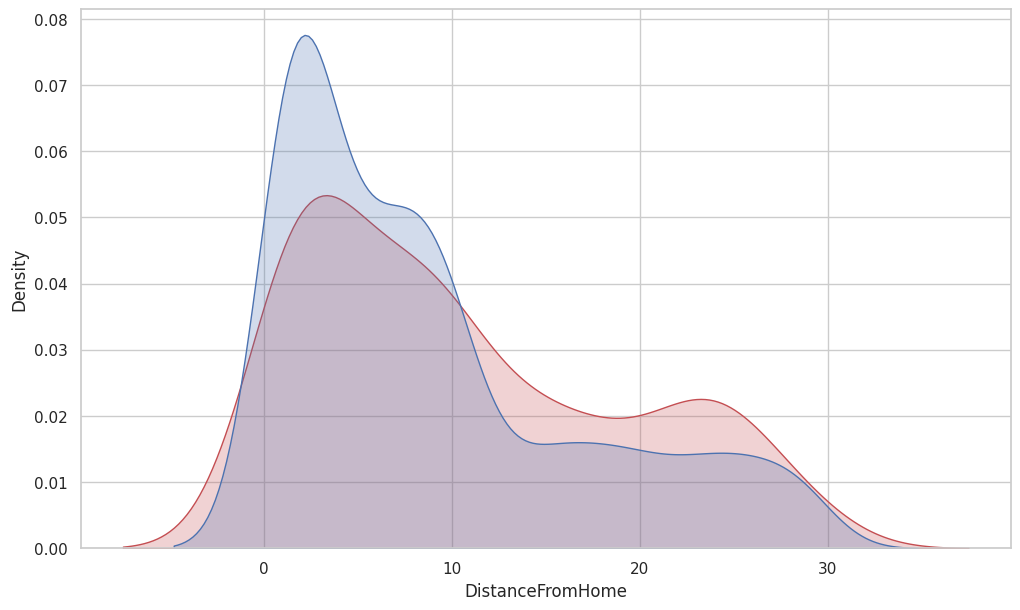

In [ ]:
# DistanceFromHome
# KDE (Kernel Density Estimate)
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['DistanceFromHome'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Funcionários que ficaram', shade = True, color = 'b');

/tmp/ipython-input-759544843.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcionários que saíram', shade = True, color = 'r')
/tmp/ipython-input-759544843.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcionários que ficaram', shade = True, color = 'b');


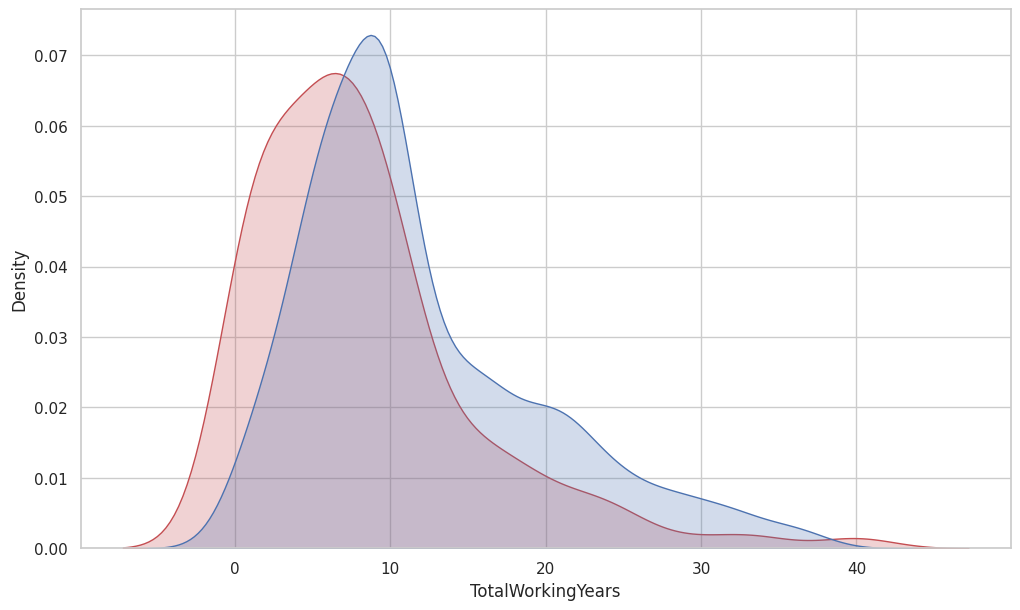

In [ ]:
# TotalWorkingYears
plt.figure(figsize=(12,7))
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Funcionários que saíram', shade = True, color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Funcionários que ficaram', shade = True, color = 'b');

💰 **Distribuição de renda por gênero e cargo**

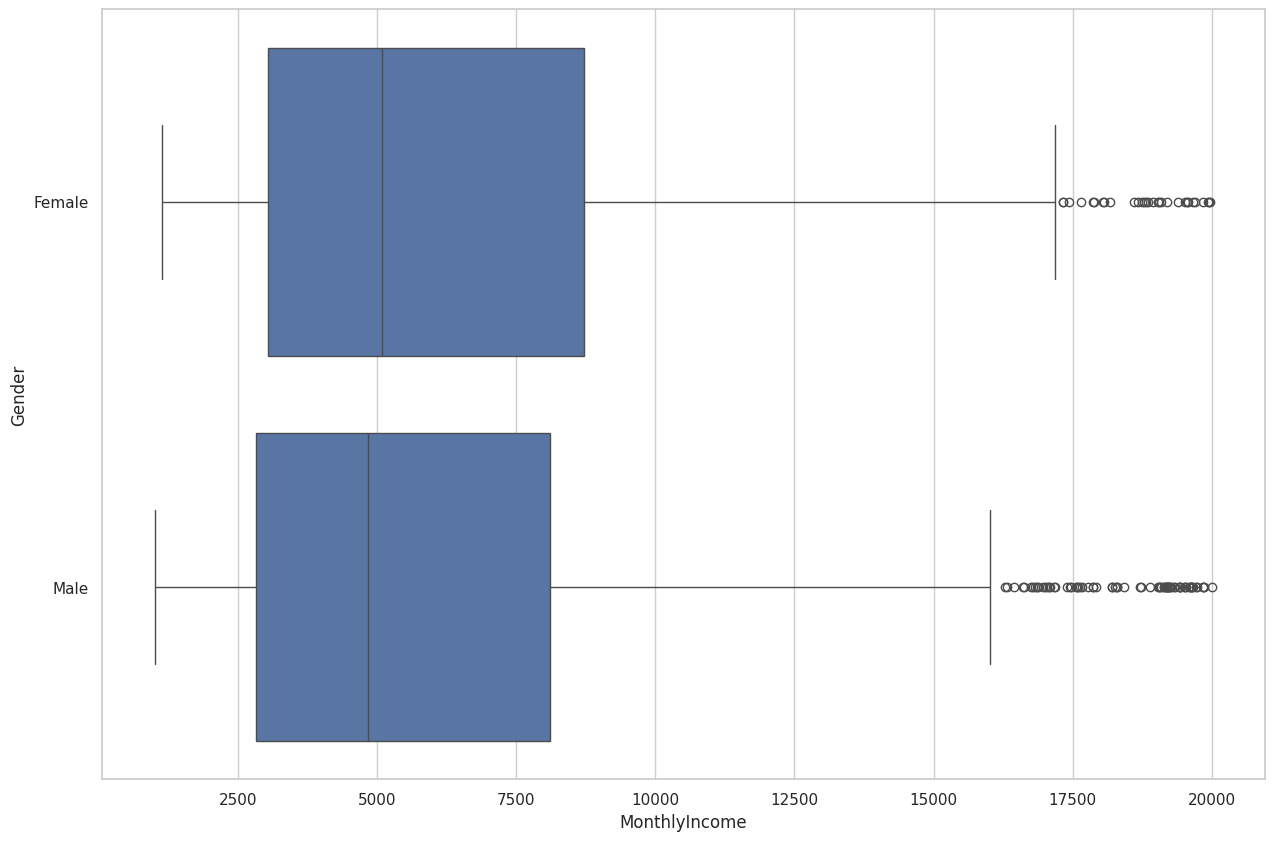

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data=employee_df);

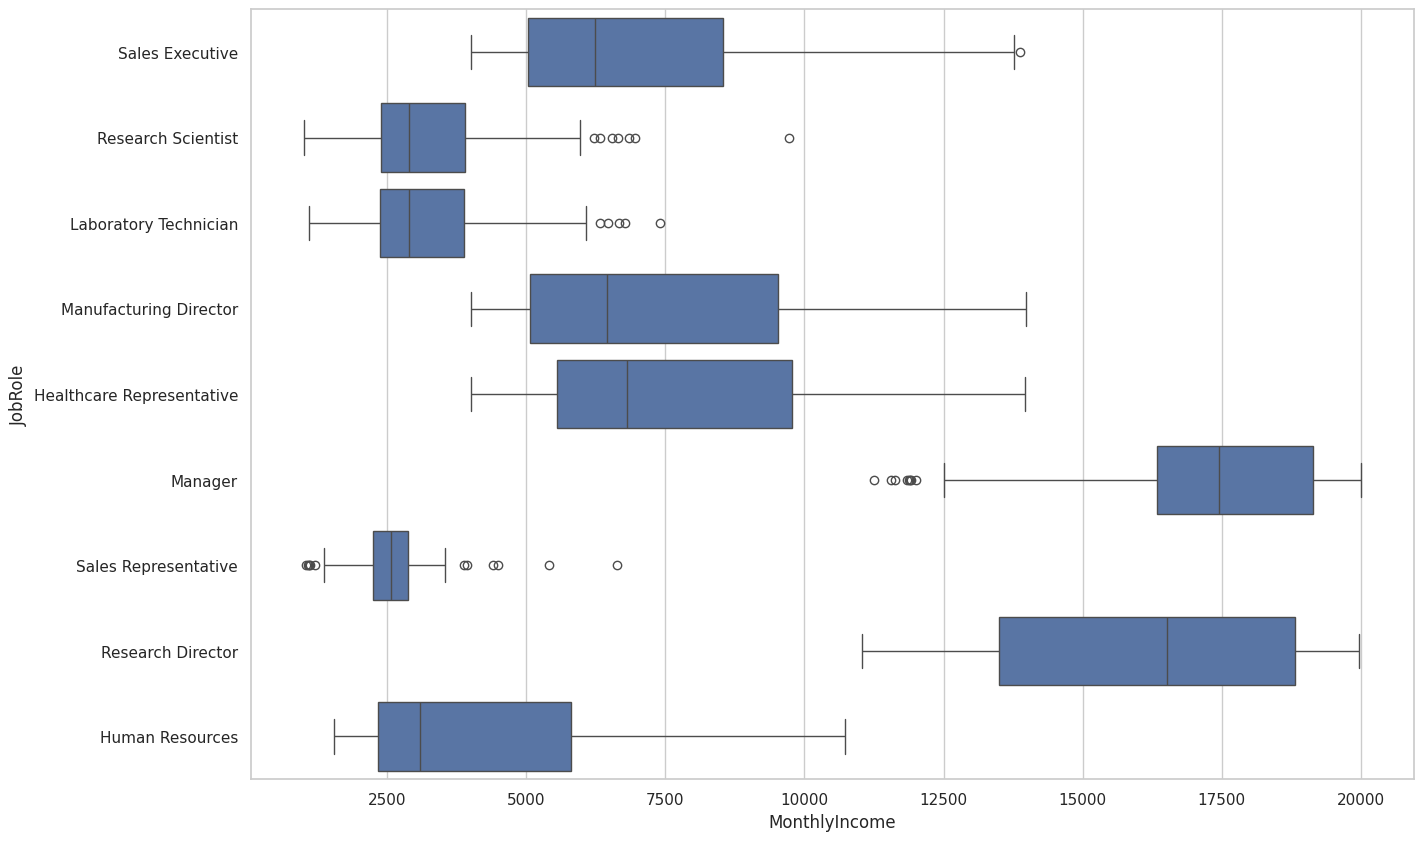

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data=employee_df);

## 🧹 Preparação dos Dados (Pré-processamento em bases de treinamento/teste)

Nesta etapa, preparamos o conjunto de dados para a construção e avaliação dos modelos de machine learning. A preparação adequada é fundamental para garantir que os modelos possam aprender padrões relevantes e produzir resultados confiáveis.

As principais atividades realizadas nesta seção incluem:

### 🔧 1. Codificação de Variáveis Categóricas

As variáveis categóricas precisam ser convertidas para valores numéricos para que possam ser interpretadas pelos algoritmos de aprendizado de máquina. Utilizaremos técnicas como **Label Encoding** e **One-Hot Encoding** conforme a natureza da variável.

### 🧼 2. Seleção de Variáveis

Remoção de colunas que não contribuem significativamente para o modelo ou que podem introduzir viés, como identificadores únicos (`EmployeeNumber`, por exemplo), além de atributos redundantes.

### 🧪 3. Separação entre Variáveis Independentes e Dependentes

A variável alvo (`Attrition`) será separada das variáveis preditoras. Essa separação é essencial para treinarmos modelos supervisionados.

### 📊 4. Normalização de Dados Numéricos

Alguns algoritmos de machine learning são sensíveis à escala das variáveis. Por isso, variáveis numéricas contínuas podem ser padronizadas utilizando o `StandardScaler` ou normalizadas com o `MinMaxScaler`.

### 🔀 5. Divisão entre Conjuntos de Treinamento e Teste

O conjunto de dados será dividido em duas partes:
- **Treinamento (Train)**: para treinar o modelo.
- **Teste (Test)**: para avaliar o desempenho do modelo em dados que ele nunca viu.

A proporção mais comum é de **70% para treino** e **30% para teste**, garantindo uma avaliação justa.


🧠 **Etapa 1: Codificação One-Hot para Variáveis Categóricas**

Variáveis categóricas precisam ser convertidas em formato numérico para que possam ser utilizadas por algoritmos de machine learning. Para isso, utilizamos o OneHotEncoder da biblioteca sklearn.



In [ ]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [ ]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
# Male Female
# 1    0
# 0    1

# Single Married Divorced
# 1      0       0
# 0      1       0
# 0      0       1

from sklearn.preprocessing import OneHotEncoder

# Extrair os nomes das colunas geradas pelo OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat_encoded = onehotencoder.fit_transform(employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']])

# Obter os nomes das variáveis
encoded_feature_names = onehotencoder.get_feature_names_out(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

# Aplicar os nomes ao DataFrame X_cat
X_cat = pd.DataFrame(X_cat_encoded.toarray(), columns=encoded_feature_names)

X_cat.shape


(1470, 26)

**🔢 Etapa 2: Seleção de Variáveis Numéricas**

Selecionamos as variáveis numéricas diretamente do DataFrame original para compor o conjunto de dados final.



In [ ]:
employee_df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
X_cat

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


**🔗 Etapa 3: Concatenando Variáveis Categóricas e Numéricas**

Agora, juntamos as variáveis categóricas (codificadas) e as variáveis numéricas em um único DataFrame, que servirá como entrada (X) para os modelos.



In [ ]:
# Concatenar variáveis categóricas e numéricas com nomes compreensíveis
X_all = pd.concat([X_cat, X_numerical], axis=1)

# Convertendo os nomes das colunas para string (evita problemas com colunas numéricas do one-hot)
X_all.columns = X_all.columns.astype(str)

X_all.head()


,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2


**📏 Etapa 4: Normalização com MinMaxScaler**

Para garantir que todas as variáveis estejam na mesma escala (entre 0 e 1), aplicamos o MinMaxScaler. Isso ajuda a melhorar o desempenho de alguns algoritmos de aprendizado de máquina, especialmente aqueles baseados em distância, como o KNN ou SVM.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Aplicando a normalização
X = scaler.fit_transform(X_all)

In [ ]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [ ]:

# Verificando o resultado
pd.DataFrame(X).head()


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


**🎯 Etapa 5: Definindo a Variável-Alvo**

Por fim, extraímos a variável-alvo Attrition, que indica se um funcionário saiu ou não da empresa. Essa variável foi previamente convertida para valores binários (1 para "Yes", 0 para "No").

In [ ]:
y = employee_df['Attrition']
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


✅ **Resultado Final**

X contém todas as variáveis explicativas já tratadas (categóricas e numéricas, normalizadas)

y contém a variável-alvo binária (Attrition)

Esses dados já estão prontos para serem utilizados na construção de modelos de machine learning nas próximas etapas do projeto.



## 🧠 Construção e Treinamento do Modelo

Nesta etapa, utilizaremos algoritmos de aprendizado de máquina para construir modelos que tentem prever a variável alvo `Attrition`, que indica se um funcionário saiu (Yes) ou permaneceu (No) na empresa.

Vamos dividir o conjunto de dados em conjuntos de treino e teste, treinar modelos com diferentes algoritmos e avaliar suas performances. Os modelos utilizados nesta seção incluem:

- Regressão Logística
- Árvore de Decisão
- Floresta Aleatória (Random Forest)
- Gradient Boosting (XGBoost)
- K-Nearest Neighbors (KNN)
- Suporte a Vetores de Máquinas (SVM)
- Redes Neurais


### 📈 Métricas de Avaliação

As métricas usadas para avaliar os modelos incluem:

- **Accuracy** (Acurácia)
- **Precision** (Precisão)
- **Recall** (Revocação)
- **F1-Score**
- **Matriz de Confusão**
- **Relatório de Classificação**

Essas métricas nos ajudam a entender o desempenho dos modelos especialmente em situações de classes desbalanceadas, como é comum em problemas de `Attrition`.



**Divisão dos Dados**

In [ ]:
from sklearn.model_selection import train_test_split

# Divisão em conjunto de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Verificando as proporções
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} registros")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} registros")


Tamanho do conjunto de treino: 1102 registros
Tamanho do conjunto de teste: 368 registros


## 🔢 Regressão Logística

A regressão logística é um dos algoritmos de classificação mais utilizados, especialmente para problemas binários como o nosso. Ela estima a probabilidade de um evento ocorrer (neste caso, `Attrition = Yes`) com base nas variáveis explicativas.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Treinando o modelo
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Previsões no conjunto de teste
y_pred_log = log_model.predict(X_test)
y_pred_prob_log = log_model.predict_proba(X_test)[:, 1]  # Probabilidades para curva ROC


In [ ]:
# Acurácia
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Acurácia da Regressão Logística: {acc_log:.4f}")

Acurácia da Regressão Logística: 0.8723


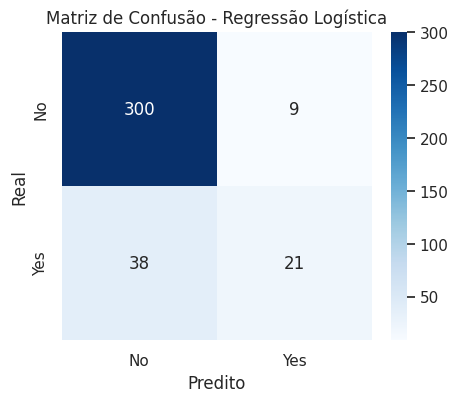

In [ ]:
# Matriz de Confusão
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()

In [ ]:
# Relatório de Classificação
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred_log))

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       309
           1       0.70      0.36      0.47        59

    accuracy                           0.87       368
   macro avg       0.79      0.66      0.70       368
weighted avg       0.86      0.87      0.85       368



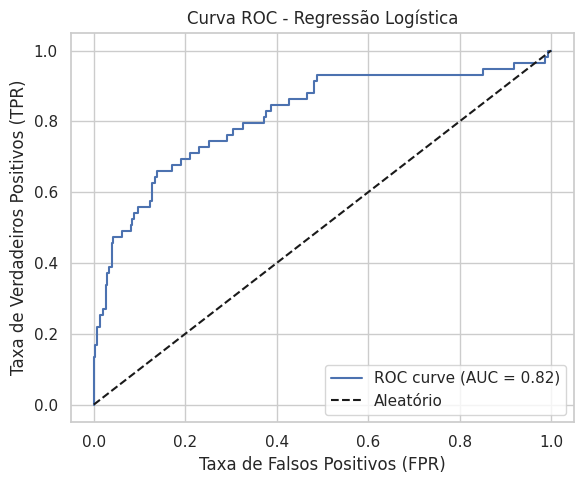

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calcular curva ROC
fpr_log, tpr_log, thresholds = roc_curve(y_test, y_pred_prob_log)
auc_log = roc_auc_score(y_test, y_pred_prob_log)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, label=f'ROC curve (AUC = {auc_log:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

### Avaliação do Modelo com Curva ROC

Para avaliar o desempenho do modelo de Regressão Logística, foi utilizada a **Curva ROC (Receiver Operating Characteristic)**. Essa curva ilustra a relação entre a **Taxa de Verdadeiros Positivos (True Positive Rate - TPR)** e a **Taxa de Falsos Positivos (False Positive Rate - FPR)** em diferentes limiares de classificação.

A figura a seguir mostra a Curva ROC gerada com base nas previsões do modelo:

> **AUC (Área sob a Curva ROC)**: 0.82

Esse valor indica que o modelo possui uma **boa capacidade de distinguir entre funcionários que permanecem e os que saem da empresa**. Em termos práticos, uma AUC de 0.82 significa que há **82% de chance do modelo classificar corretamente um funcionário que saiu como tendo maior probabilidade de saída do que um funcionário que permaneceu**.

Uma AUC igual a 1 representa um modelo perfeito, enquanto uma AUC de 0.5 indica um desempenho aleatório. Assim, o resultado obtido demonstra que o modelo apresenta um **desempenho satisfatório** e pode ser útil como ferramenta preditiva no apoio à tomada de decisão em Recursos Humanos.


## 🌳 Modelo: Árvore de Decisão

Nesta etapa, treinamos um modelo de **Árvore de Decisão (Decision Tree)** para prever se um funcionário deixará ou não a empresa, com base em variáveis numéricas e categóricas transformadas.

A Árvore de Decisão é um algoritmo de aprendizado supervisionado que funciona como um fluxo de decisões. Ela segmenta os dados em ramos baseados nas variáveis mais relevantes, o que a torna facilmente interpretável.

### 📌 Etapas Realizadas:

1. **Treinamento do modelo:** Utilizamos o conjunto de treino `X_train` e `y_train`.
2. **Predições:** Geramos as previsões no conjunto de teste `X_test`.
3. **Avaliação:** Avaliamos o desempenho do modelo com métricas como:
   - Acurácia
   - Precisão
   - Revocação (Recall)
   - F1-Score
   - Matriz de Confusão
4. **Curva ROC:** Geramos a curva ROC para visualizar a capacidade discriminativa do modelo.

Essa abordagem nos permite observar como a árvore segmenta os dados e quais variáveis mais influenciam nas decisões do modelo.


**✅ Treinamento e Avaliação do Modelo**

Primeiramente, instanciamos o modelo `DecisionTreeClassifier` da biblioteca `sklearn` e o treinamos com os dados de treino. Em seguida, realizamos a predição e avaliamos o desempenho do modelo com as seguintes métricas:

- **Acurácia**: porcentagem de acertos do modelo.
- **Relatório de Classificação**: fornece métricas como precision, recall e F1-score.
- **Matriz de Confusão**: permite visualizar a proporção de acertos e erros por classe (evasão ou permanência).

Além disso, utilizamos a função `predict_proba` para obter as probabilidades preditas, que são usadas na Curva ROC.


In [ ]:
# 📦 Importação das bibliotecas necessárias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 🌳 Instanciando e treinando o modelo
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# 📊 Realizando predições
y_pred_tree = tree_model.predict(X_test)
y_pred_prob_tree = tree_model.predict_proba(X_test)[:, 1]  # Probabilidades para curva ROC

# ✅ Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred_tree))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_tree))


Acurácia: 0.7608695652173914

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       309
           1       0.28      0.31      0.29        59

    accuracy                           0.76       368
   macro avg       0.57      0.58      0.57       368
weighted avg       0.77      0.76      0.77       368



**📊 Matriz de Confusão**

A matriz de confusão mostra a performance do modelo em termos de número de acertos e erros para cada classe.


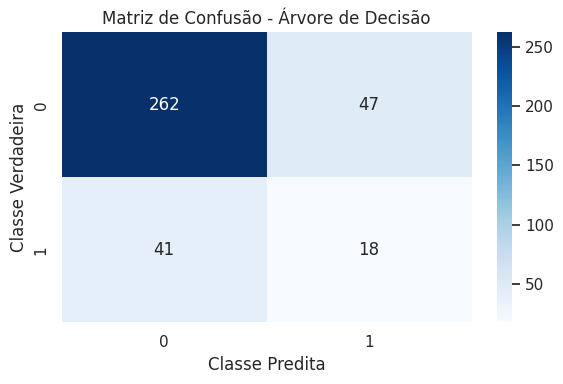

In [ ]:
# 🧱 Matriz de Confusão
cm_tree = confusion_matrix(y_test, y_pred_tree)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')
plt.tight_layout()
plt.show()


**📈 Curva ROC e AUC**

A **Curva ROC (Receiver Operating Characteristic)** permite visualizar a relação entre a taxa de falsos positivos (FPR) e a taxa de verdadeiros positivos (TPR). Quanto mais próxima da diagonal superior esquerda, melhor o modelo. O **AUC (Área sob a Curva)** quantifica essa performance — quanto mais próximo de 1, melhor.



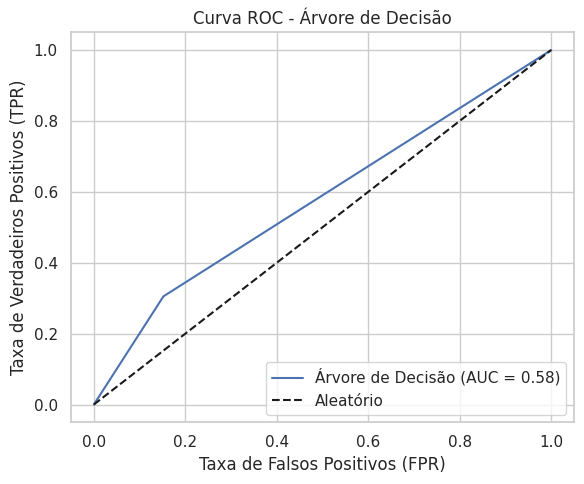

In [ ]:
# 🔍 Curva ROC
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, y_pred_prob_tree)
auc_tree = roc_auc_score(y_test, y_pred_prob_tree)

plt.figure(figsize=(6, 5))
plt.plot(fpr_tree, tpr_tree, label=f'Árvore de Decisão (AUC = {auc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC - Árvore de Decisão')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


## Modelo Random Forest

Após aplicar o modelo de Regressão Logística, utilizamos também o algoritmo **Random Forest**, que é um dos modelos de aprendizado de máquina mais eficazes para problemas de classificação. A Random Forest constrói múltiplas árvores de decisão e combina suas previsões para melhorar a acurácia e reduzir o risco de overfitting.

### Treinamento do Modelo

O modelo foi treinado com os mesmos dados utilizados anteriormente, utilizando o conjunto de treino e validado com o conjunto de teste. Os parâmetros padrão do `RandomForestClassifier` do scikit-learn foram utilizados, com 100 árvores (estimators) como configuração inicial.

### Métricas de Avaliação

A performance do modelo foi avaliada com base nas seguintes métricas:

- **Acurácia**
- **Precisão**
- **Revocação (Recall)**
- **F1-Score**
- **Matriz de Confusão**
- **Curva ROC e AUC**

Essas métricas foram calculadas sobre o conjunto de teste para garantir uma avaliação imparcial do modelo.


Na próxima seção, será apresentada a **curva ROC e o valor de AUC** do modelo Random Forest, permitindo uma comparação direta com o modelo de Regressão Logística.


In [ ]:
# Importação das bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Treinamento do modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Previsões
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva

# Avaliação do modelo
print("Relatório de Classificação - Random Forest")
print(classification_report(y_test, y_pred_rf, target_names=["Permaneceu", "Saiu"]))


Relatório de Classificação - Random Forest
              precision    recall  f1-score   support

  Permaneceu       0.85      0.99      0.91       309
        Saiu       0.56      0.08      0.15        59

    accuracy                           0.84       368
   macro avg       0.70      0.54      0.53       368
weighted avg       0.80      0.84      0.79       368



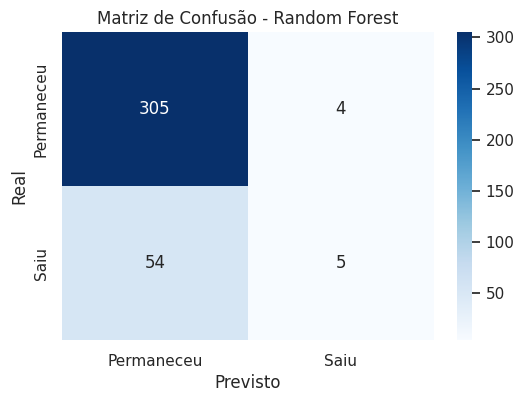

In [ ]:
# Matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Permaneceu", "Saiu"], yticklabels=["Permaneceu", "Saiu"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Random Forest")
plt.show()


**🌲 Importância das Variáveis - Random Forest**

Após o treinamento do modelo Random Forest, é possível verificar quais variáveis mais contribuíram para as decisões do modelo por meio da análise de **importância das variáveis** (feature importance).

Entretanto, como aplicamos **codificação one-hot** nas variáveis categóricas (`BusinessTravel`, `Department`, `EducationField`, `Gender`, `JobRole` e `MaritalStatus`), cada categoria se tornou uma nova coluna binária. Isso faz com que a importância dessas variáveis seja diluída entre suas representações codificadas. Para contornar essa limitação e tornar a visualização mais interpretável:

#### ✅ Etapas realizadas:

1. **Recuperamos os nomes das colunas geradas pelo OneHotEncoder**, usando o método `get_feature_names_out`, o que nos permitiu identificar corretamente as categorias originais.
2. **Renomeamos as colunas do DataFrame `X_cat`** com esses nomes descritivos.
3. **Concatenamos `X_cat` com as variáveis numéricas (`X_numerical`)** para formar o conjunto de dados final `X_all` com nomes compreensíveis.
4. **Treinamos o modelo Random Forest** com esse novo conjunto de dados com colunas nomeadas corretamente.
5. **Selecionamos e visualizamos as 15 variáveis mais importantes** de forma ordenada.

#### 🔍 As 15 variáveis mais relevantes para o modelo foram:

- `MonthlyIncome`
- `Age`
- `DailyRate`
- `TotalWorkingYears`
- `HourlyRate`
- `DistanceFromHome`
- `MonthlyRate`
- `YearsAtCompany`
- `YearsWithCurrManager`
- `OverTime`
- `PercentSalaryHike`
- `NumCompaniesWorked`
- `YearsInCurrentRole`
- `WorkLifeBalance`
- `StockOptionLevel`

Essas variáveis ajudaram o modelo a identificar padrões de saída ou permanência dos funcionários. Por exemplo, características como **salário mensal (`MonthlyIncome`)**, **tempo total de experiência (`TotalWorkingYears`)**, **idade (`Age`)** e **horas extras (`OverTime`)** aparecem como importantes indicadoras de comportamento de evasão.

A seguir, apresentamos o gráfico de barras com as variáveis mais importantes, destacando visualmente a relevância de cada uma.



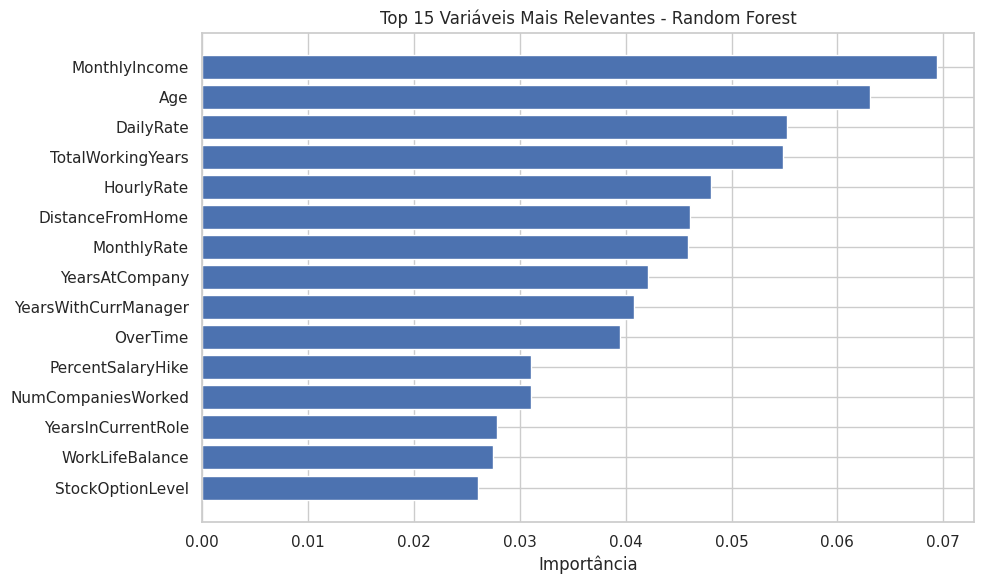

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Importâncias das variáveis
importances = rf_model.feature_importances_
features = X_all.columns

# Top N
N = 15
indices = np.argsort(importances)[::-1]
top_features = features[indices[:N]]
top_importances = importances[indices[:N]]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importances[::-1])
plt.xlabel("Importância")
plt.title("Top 15 Variáveis Mais Relevantes - Random Forest")
plt.tight_layout()
plt.show()



**Curva ROC e AUC:**

AUC - Random Forest: 0.78


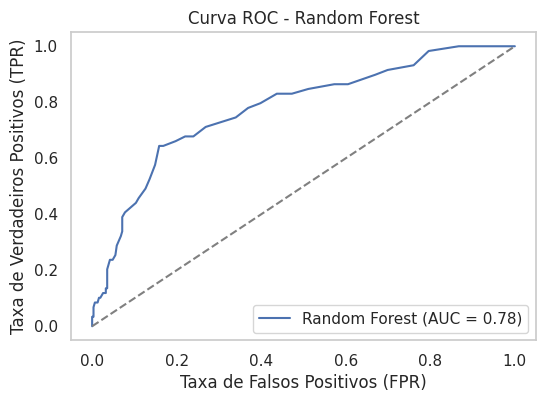

In [ ]:
# Cálculo da Curva ROC e AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)


print(f"AUC - Random Forest: {auc_rf:.2f}")

# Plot da Curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.grid()
plt.show()


### 🌳 Modelo Gradient Boosting (XGBoost)

O **Gradient Boosting** é uma técnica de aprendizado de máquina baseada em ensemble, onde modelos fracos (geralmente árvores de decisão) são combinados sequencialmente para formar um modelo forte. Cada novo modelo corrige os erros cometidos pelos anteriores, utilizando o gradiente do erro como base para o ajuste.

O **XGBoost (Extreme Gradient Boosting)** é uma implementação otimizada e de alto desempenho do algoritmo de Gradient Boosting. Ele é amplamente utilizado por seu desempenho superior em tarefas de classificação e regressão, especialmente em conjuntos de dados com características complexas e alta dimensionalidade.


**🔧 Implementação com XGBoost**

Neste trabalho, utilizamos a classe `XGBClassifier` da biblioteca `xgboost`. O modelo foi treinado com os dados de treino e avaliado com as principais métricas de classificação. O parâmetro `random_state=42` foi utilizado para garantir reprodutibilidade.

As métricas utilizadas na avaliação do modelo foram:

- **Acurácia**: proporção de acertos sobre o total de previsões;
- **Relatório de Classificação**: apresenta Precisão, Revocação (Recall) e F1-Score para cada classe;
- **Matriz de Confusão**: mostra a quantidade de acertos e erros do modelo;
- **Curva ROC e AUC**: a curva ROC representa a taxa de verdadeiros positivos em relação à taxa de falsos positivos, e a AUC (Área sob a Curva) mede a capacidade discriminativa do classificador.


In [ ]:
# Instala o XGBoost se ainda não estiver instalado
!pip install -q xgboost

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Treinamento do modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predição
y_pred_xgb = xgb_model.predict(X_test)

# Probabilidades para a Curva ROC
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [10:56:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**✅ Resultados Obtidos**

Após o treinamento, os seguintes resultados foram obtidos:


In [ ]:
# Métricas
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia do XGBoost: {acc_xgb:.2f}")
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_xgb))


Acurácia do XGBoost: 0.86
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       309
           1       0.68      0.25      0.37        59

    accuracy                           0.86       368
   macro avg       0.78      0.62      0.65       368
weighted avg       0.84      0.86      0.83       368




A curva ROC e a matriz de confusão também foram geradas para ilustrar visualmente o desempenho do modelo.

O XGBoost demonstrou ser eficiente na tarefa de classificação das linhas de ônibus com base nas variáveis disponíveis, mostrando um equilíbrio entre precisão e revocação, mesmo em um cenário de classes potencialmente desbalanceadas.

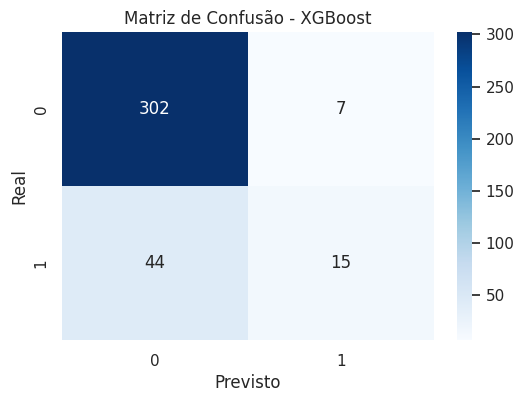

In [ ]:
#matriz de confusão
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - XGBoost")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


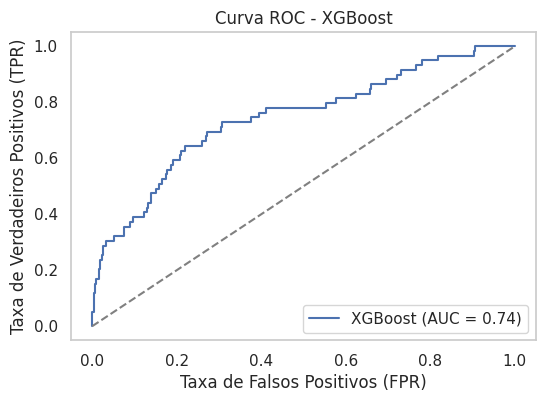

AUC do XGBoost: 0.74


In [ ]:
# Calculo da Curva ROC e AUC
from sklearn.metrics import roc_curve, auc

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(6, 4))
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - XGBoost")
plt.legend(loc="lower right")
plt.grid()
plt.show()


print(f"AUC do XGBoost: {auc_xgb:.2f}")


##🤝 Modelo K-Nearest Neighbors (KNN)

O **K-Nearest Neighbors (KNN)** é um algoritmo de classificação supervisionada baseado em instâncias. Ele classifica um novo dado com base na classe majoritária dos `K` vizinhos mais próximos no espaço das características (features).

Este algoritmo é simples, porém eficaz, especialmente em casos onde as fronteiras de decisão não são lineares. Sua eficácia depende fortemente da escolha do número de vizinhos `K` e da métrica de distância utilizada (por padrão, a **distância Euclidiana**).


#### 🔧 Implementação com KNN

Neste experimento, utilizamos a classe `KNeighborsClassifier` da biblioteca `sklearn.neighbors`. Os principais parâmetros utilizados foram:

- `n_neighbors=5`: número de vizinhos considerados;
- `metric='minkowski'` com `p=2`: distância Euclidiana.

Assim como nos outros modelos, foram utilizadas as seguintes métricas de avaliação:

- **Acurácia**: proporção de previsões corretas;
- **Relatório de Classificação**: inclui precisão, recall e F1-score;
- **Matriz de Confusão**;
- **Curva ROC e AUC**.

Acurácia do KNN: 0.8478260869565217

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       309
           1       0.64      0.12      0.20        59

    accuracy                           0.85       368
   macro avg       0.75      0.55      0.56       368
weighted avg       0.82      0.85      0.80       368



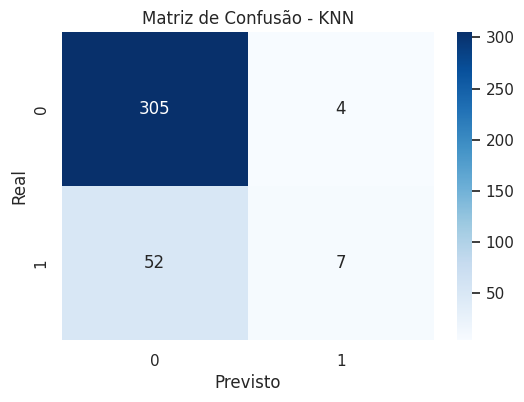

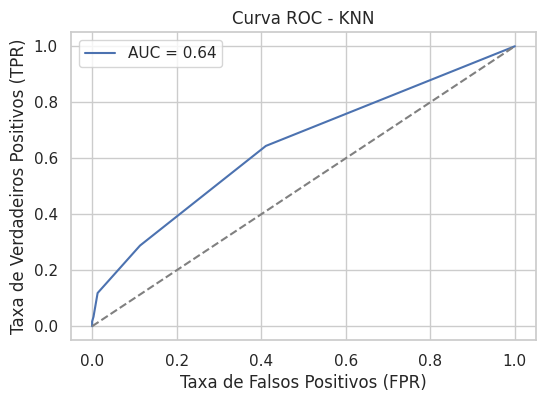

In [ ]:
# Importando bibliotecas necessárias
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Criando e treinando o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)

# Previsões
y_pred_knn = knn_model.predict(X_test)
y_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Avaliação do modelo
print("Acurácia do KNN:", accuracy_score(y_test, y_pred_knn))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_knn))

# Matriz de Confusão
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - KNN")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Curva ROC e AUC
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
auc_knn = roc_auc_score(y_test, y_proba_knn)

plt.figure(figsize=(6, 4))
plt.plot(fpr_knn, tpr_knn, label=f"AUC = {auc_knn:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - KNN")
plt.legend()
plt.show()


#### ✅ Resultados Obtidos

Após o treinamento do modelo KNN com os dados, os principais resultados obtidos foram:

- **Acurácia**: `85%`  
- **AUC**: `0.64`

Apesar de sua simplicidade, o KNN pode ser sensível à dimensionalidade e à escala dos dados, o que foi tratado previamente com a padronização das variáveis via `MinMaxScaler`.



## Support Vector Machine (SVM)

O modelo SVM (Support Vector Machine) é uma técnica de aprendizado supervisionado amplamente utilizada para problemas de classificação e regressão. O objetivo principal do SVM é encontrar o hiperplano ideal que separa as classes com a maior margem possível.

Na prática, o SVM realiza uma transformação dos dados para um espaço de maior dimensão, onde um separador linear pode ser encontrado mesmo que os dados originais não sejam linearmente separáveis. Isso é feito através do uso de **funções kernel**, como o RBF (Radial Basis Function), linear, ou polinomial.

Nesta análise, utilizaremos o kernel RBF (radial) para classificar os dados do problema de inadimplência.

### Vantagens do SVM:
- Eficiente em espaços de alta dimensão.
- Funciona bem com margens claras de separação.
- Eficiente quando o número de dimensões é maior que o número de amostras.

### Desvantagens do SVM:
- Pouco eficiente em grandes volumes de dados.
- Pouco interpretável.
- Sensível à escolha dos parâmetros e do tipo de kernel.

Vamos agora treinar o modelo SVM e avaliar seu desempenho com métricas de classificação, matriz de confusão e a curva ROC.



💻 **Código: Implementação do SVM**

Acurácia do SVM: 0.8586956521739131

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       309
           1       0.89      0.14      0.24        59

    accuracy                           0.86       368
   macro avg       0.87      0.57      0.58       368
weighted avg       0.86      0.86      0.81       368



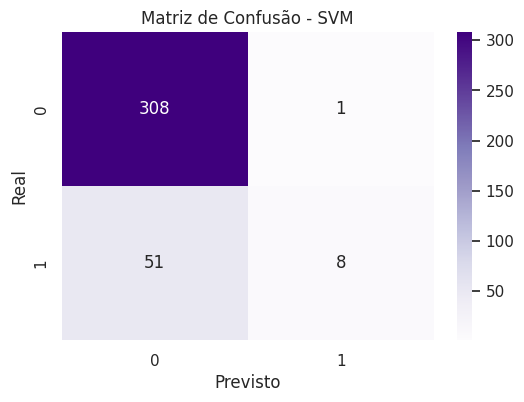

AUC do SVM: 0.7909330261642257


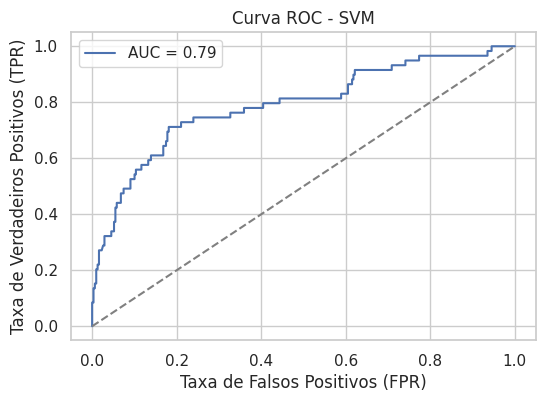

In [ ]:
# Importando bibliotecas necessárias
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Criando e treinando o modelo SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Previsões
y_pred_svm = svm_model.predict(X_test)
y_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Avaliação do modelo
print("Acurácia do SVM:", accuracy_score(y_test, y_pred_svm))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_svm))

# Matriz de Confusão
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Purples")
plt.title("Matriz de Confusão - SVM")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Curva ROC e AUC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
auc_svm = roc_auc_score(y_test, y_proba_svm)

print("AUC do SVM:", auc_svm)

plt.figure(figsize=(6, 4))
plt.plot(fpr_svm, tpr_svm, label=f"AUC = {auc_svm:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - SVM")
plt.legend()
plt.show()


### 🔍 Ajustes no Modelo SVM (Support Vector Machine)

Nesta etapa, realizamos ajustes no modelo de Support Vector Machine (SVM) para melhorar o desempenho na classificação de evasão estudantil, considerando o desbalanceamento das classes na base de dados.

#### ⚙️ Estratégias de Ajuste Utilizadas

- **Balanceamento de classes com `class_weight='balanced'`**  
  O parâmetro `class_weight='balanced'` foi utilizado para penalizar mais os erros da classe minoritária (evasão = 1), equilibrando o impacto das classes durante o treinamento.

- **Busca de Hiperparâmetros com `GridSearchCV`**  
  Utilizamos validação cruzada com grade de parâmetros para encontrar a melhor combinação de hiperparâmetros:
  - `C`: Parâmetro de regularização (valores testados: 0.1, 1, 10).
  - `kernel`: Tipos de função núcleo (`linear` e `rbf`).
  - `gamma`: Apenas para o kernel RBF (`scale`, `auto`).
  - `class_weight`: Mantido como `'balanced'` para todos os testes.

- **Otimização com base na métrica F1-score**  
  O `f1-score` foi escolhido como métrica principal de otimização por ser mais apropriado em problemas com dados desbalanceados, já que combina precisão e recall.

#### 📈 Resultados Esperados

- Aumento do **recall** para a classe de evasão (classe 1), ajudando a reduzir falsos negativos.
- Melhora no **f1-score**, refletindo um melhor equilíbrio entre precisão e recall.
- Potencial aumento na **AUC (Área sob a Curva ROC)**.

> ⚠️ O ajuste foi pensado especialmente para cenários de dados desbalanceados, comuns em situações reais onde o número de evasões é significativamente menor do que o número de permanências.



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros: {'C': 10, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}


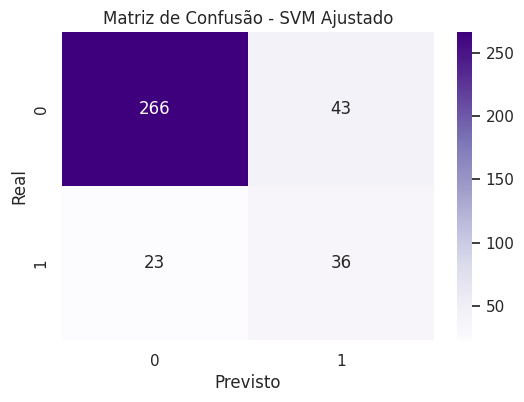

Acurácia do SVM ajustado: 0.8206521739130435
AUC do SVM ajustado: 0.8037957325434699
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       309
           1       0.46      0.61      0.52        59

    accuracy                           0.82       368
   macro avg       0.69      0.74      0.71       368
weighted avg       0.85      0.82      0.83       368



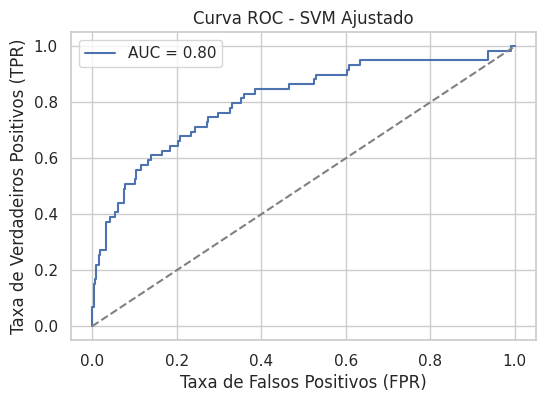

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Definindo a grade de parâmetros
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']  # força o modelo a considerar o desbalanceamento
}

# Instanciando o modelo base
svm_model = SVC(probability=True)

# Usando GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Treinando
grid_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_svm = grid_search.best_estimator_
print("Melhores parâmetros:", grid_search.best_params_)

# Avaliando no conjunto de teste
y_pred_best_svm = best_svm.predict(X_test)
y_proba_best_svm = best_svm.predict_proba(X_test)[:, 1]



# Matriz de confusao
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best_svm, annot=True, fmt="d", cmap="Purples")
plt.title("Matriz de Confusão - SVM Ajustado")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

#curva roc e auc
fpr_best_svm, tpr_best_svm, _ = roc_curve(y_test, y_proba_best_svm)
auc_best_svm = roc_auc_score(y_test, y_proba_best_svm)

# Relatório de avaliação
print("Acurácia do SVM ajustado:", accuracy_score(y_test, y_pred_best_svm))
print("AUC do SVM ajustado:", roc_auc_score(y_test, y_proba_best_svm))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred_best_svm))

plt.figure(figsize=(6, 4))
plt.plot(fpr_best_svm, tpr_best_svm, label=f"AUC = {auc_best_svm:.2f}")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")

plt.title("Curva ROC - SVM Ajustado")
plt.legend()
plt.show()




### Avaliação do Modelo SVM Após Ajuste de Hiperparâmetros

Após a realização da busca em grade (GridSearchCV) para ajuste de hiperparâmetros do modelo SVM, foi possível observar uma **melhora significativa na capacidade do modelo em identificar a classe minoritária**.

Os melhores parâmetros encontrados foram:
- `C = 10`
- `kernel = 'rbf'`
- `gamma = 'auto'`
- `class_weight = 'balanced'`

Essas configurações permitiram lidar melhor com o desbalanceamento entre as classes, especialmente ao utilizar `class_weight='balanced'`, que ajusta os pesos automaticamente com base na frequência das classes no conjunto de dados.

#### Métricas do modelo ajustado:
- **Acurácia:** 0.82
- **AUC:** 0.80
- **Recall para a classe 1 (de interesse):** 0.61
- **F1-score da classe 1:** 0.52

Comparado ao modelo SVM antes do ajuste, que apresentava recall de apenas 0.14 para a classe 1, o modelo ajustado **melhorou substancialmente sua sensibilidade**, ainda que com um pequeno custo na acurácia geral. Essa troca é aceitável quando há maior interesse em **detectar corretamente a classe menos representada**, como é o caso nesta aplicação.

O resultado indica que o modelo SVM ajustado é mais equilibrado e adequado para cenários onde a **detecção correta da minoria é crítica**.


## 🧠 Rede Neural Artificial (ANN)

Nesta etapa, construímos e treinamos uma **rede neural densa (feedforward)** para prever a probabilidade de saída ou permanência de funcionários com base nas variáveis preditoras disponíveis.

A arquitetura da rede foi baseada na recomendação do artigo "*Quantas camadas escondidas e quantos neurônios incluir numa rede neural artificial*?" do IAExpert Academy


- Quantos neurônios e quantas camadas? https://iaexpert.academy/2020/05/04/quantas-camadas-escondidas-e-quantos-neuronios-incluir-numa-rede-neural-artificial/




### Construção e Treinamento da Rede Neural

Nesta etapa, foi construída uma rede neural densa (fully connected) utilizando a biblioteca TensorFlow/Keras. O objetivo é realizar a **classificação binária** com base nos dados de entrada.

A arquitetura da rede foi definida com as seguintes camadas:

- **Camada de entrada** com 50 neurônios de entrada (conforme o shape de `X_train`), conectada a uma camada densa com 25 unidades e função de ativação **ReLU**;
- **Duas camadas ocultas** adicionais, cada uma com 25 neurônios e também utilizando a ativação **ReLU**;
- **Camada de saída** com 1 neurônio e ativação **sigmoid**, adequada para tarefas de classificação binária, pois retorna uma probabilidade entre 0 e 1.

### Arquitetura da Rede

| Camada         | Tipo       | Unidades | Ativação | Parâmetros |
|----------------|------------|----------|----------|------------|
| densa_0        | Dense      | 25       | ReLU     | 1.275      |
| densa_1        | Dense      | 25       | ReLU     | 650        |
| densa_2        | Dense      | 25       | ReLU     | 650        |
| densa_3        | Dense      | 1        | Sigmoid  | 26         |
| **Total**      |            |          |          | **2.601**  |

A rede foi compilada com o otimizador **Adam**, função de perda **binary_crossentropy** e métrica de avaliação **accuracy**.

O treinamento foi realizado por **200 épocas** sobre os dados de treino (`X_train` e `y_train`). Após o treinamento, a rede foi utilizada para gerar previsões no conjunto de teste (`X_test`). Para interpretar os resultados, as probabilidades geradas foram convertidas em classes (`0` ou `1`) utilizando um threshold de 0.5.

Por fim, foi gerada a **matriz de confusão** e o **relatório de classificação** contendo métricas como precisão, recall e F1-score, permitindo uma avaliação completa do desempenho do modelo.


### 📦 Implementação da Rede Neural

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Criação do modelo sequencial
rede_neural = tf.keras.models.Sequential()

# Camada de entrada e primeira camada oculta com 25 neurônios e função de ativação ReLU
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu', input_shape=(50,)))

# Segunda camada oculta com 25 neurônios e função de ativação ReLU
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu'))

# Terceira camada oculta com 25 neurônios e função de ativação ReLU
rede_neural.add(tf.keras.layers.Dense(units=25, activation='relu'))

# Camada de saída com 1 neurônio e função de ativação sigmoide (ideal para classificação binária)
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Exibe o resumo da arquitetura da rede
rede_neural.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601 (10.16 KB)

 Trainable params: 2,601 (10.16 KB)

 Non-trainable params: 0 (0.00 B)

A camada de entrada espera vetores com 50 atributos (features). Cada camada oculta possui 25 neurônios e utiliza a função de ativação ReLU, enquanto a camada de saída usa a função sigmoid, apropriada para problemas de classificação binária.

###Compilação e Treinamento

A rede foi compilada com o otimizador Adam, função de perda binary_crossentropy (adequada para classificação binária) e métrica de avaliação acurácia.

In [ ]:
# Compilação do modelo
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinamento da rede por 200 épocas
rede_neural.fit(X_train, y_train, epochs=200)


Epoch 1/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8305 - loss: 0.5438
Epoch 2/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8378 - loss: 0.4208
Epoch 3/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8365 - loss: 0.4053
Epoch 4/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8495 - loss: 0.3581
Epoch 5/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8585 - loss: 0.3471
Epoch 6/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8642 - loss: 0.3326
Epoch 7/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8808 - loss: 0.2971
Epoch 8/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8860 - loss: 0.3198
Epoch 9/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8859 - loss: 0.2902
Epoch 10/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8916 - loss: 0.2902
Epoch 11/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8877 - loss: 0.2935
Epoch 12/200
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

###Predição e Avaliação

Após o treinamento, foram feitas as previsões e calculadas as métricas de avaliação:

In [ ]:
# Realização das previsões
y_pred_nn = rede_neural.predict(X_test)

# Converte as probabilidades para valores binários (True se >= 0.5)
y_pred_nn_bin = (y_pred_nn >= 0.5)

# Pegando as probabilidades diretamente do .predict()
y_proba_nn = y_pred_nn.flatten()


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


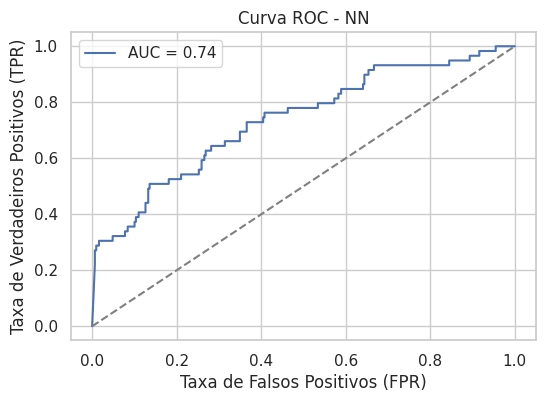

In [ ]:
#curva ROC
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
auc_nn = roc_auc_score(y_test, y_proba_nn)

#plotar curva ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_nn, tpr_nn, label=f"AUC = {auc_nn:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Taxa de Falsos Positivos (FPR)")
plt.ylabel("Taxa de Verdadeiros Positivos (TPR)")
plt.title("Curva ROC - NN")
plt.legend()
plt.show()


###Matriz de Confusão

<Axes: >

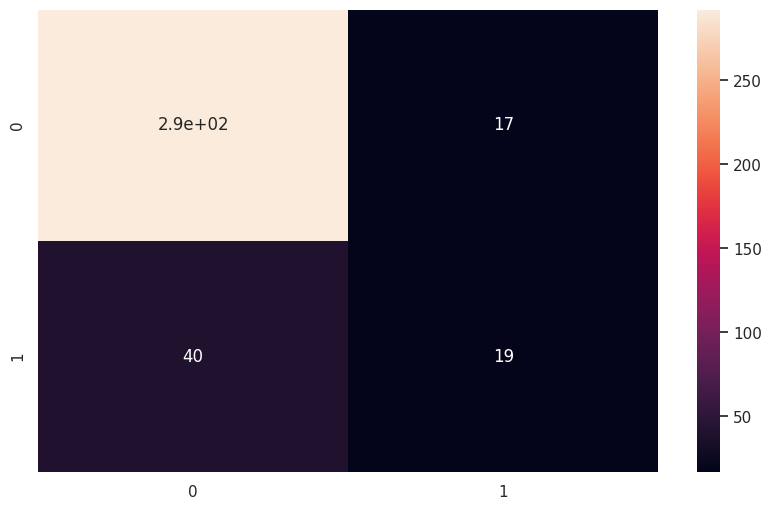

In [ ]:
# Matriz de confusão
cm_nn = confusion_matrix(y_test, y_pred_nn_bin)
# Visualização da matriz de confusão
sns.heatmap(cm_nn, annot=True)



###Relatório de Classificação

In [ ]:
# Relatório de classificação (precisão, recall e f1-score)
print(classification_report(y_test, y_pred_nn_bin))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       309
           1       0.53      0.32      0.40        59

    accuracy                           0.85       368
   macro avg       0.70      0.63      0.66       368
weighted avg       0.82      0.85      0.83       368



###Considerações

Apesar da boa acurácia global (82%), o modelo apresenta desempenho limitado para a classe minoritária (1), com baixa revocação e F1-score. Isso pode indicar um desequilíbrio na base de dados ou uma necessidade de ajustar o modelo ou a métrica de avaliação, principalmente se a classe 1 for mais relevante para o problema (por exemplo, detectar anomalias, fraudes, doenças, etc.).

##  Comparação de Modelos de Classificação

Após o treinamento de diversos modelos de machine learning, é fundamental avaliá-los e compará-los com base em métricas de desempenho. Esta etapa tem como objetivo identificar qual modelo apresenta os melhores resultados para o problema de previsão de saída de funcionários da empresa.

Nesta seção, realizamos uma análise comparativa dos seguintes modelos:

- Regressão Logística  
- Árvore de Decisão  
- Random Forest  
- XGBoost  
- K-Nearest Neighbors (KNN)  
- Support Vector Machine (SVM)  
- SVM com ajuste de hiperparâmetros (GridSearchCV)  
- Rede Neural Artificial  

As comparações são feitas utilizando as seguintes abordagens:

1. **Acurácia**: percentual de previsões corretas sobre o total de exemplos.
2. **Curvas ROC e AUC (Área sob a Curva)**: indicam a capacidade do modelo em distinguir entre classes, independentemente do limiar de decisão.
3. **Matriz de Confusão**: mostra o desempenho do modelo em termos de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.

Com base nessas métricas, identificamos o(s) modelo(s) com melhor desempenho, o que nos permite escolher a melhor solução para ser utilizada em produção.

A seguir, apresentamos o código para geração dessas comparações e visualizações.


Acurácia dos modelos:
Regressão Logística: 0.8723
Árvore de Decisão: 0.7609
Random Forest: 0.8424
XGBoost: 0.8614
KNN: 0.8478
SVM: 0.8587
SVM (GridSearchCV): 0.8207
Rede Neural: 0.8451

O melhor modelo com maior acurácia é: Regressão Logística com valor: 0.8723


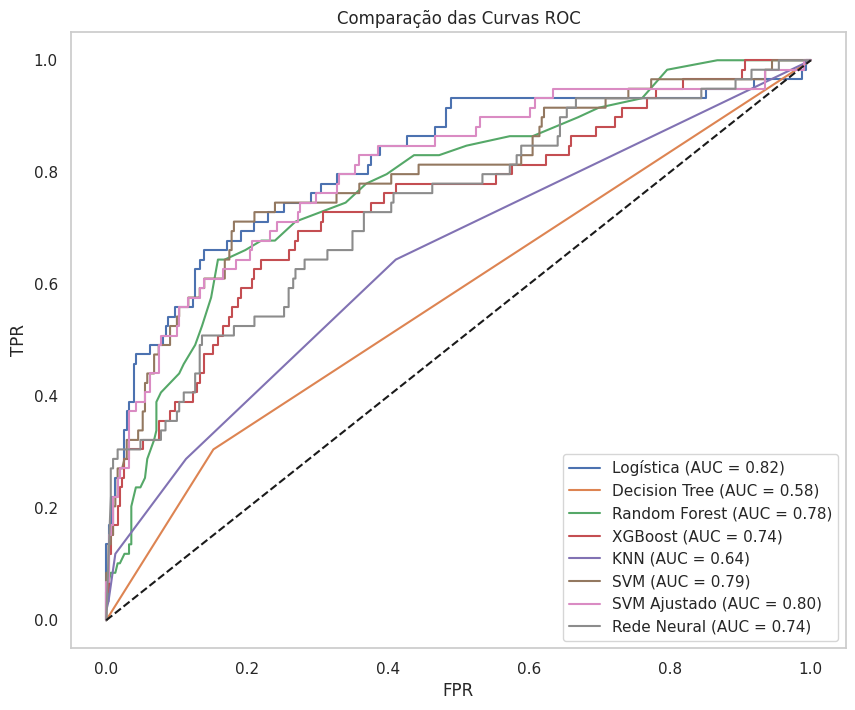


AUC dos modelos:
Regressão Logística: 0.8160
Árvore de Decisão: 0.5765
Random Forest: 0.7779
XGBoost: 0.7441
KNN: 0.6442
SVM: 0.7909
SVM (GridSearchCV): 0.8038
Rede Neural: 0.7368

O modelo com a maior AUC é: Regressão Logística com AUC de 0.8160


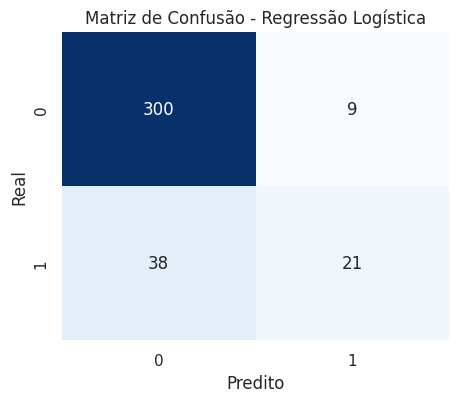

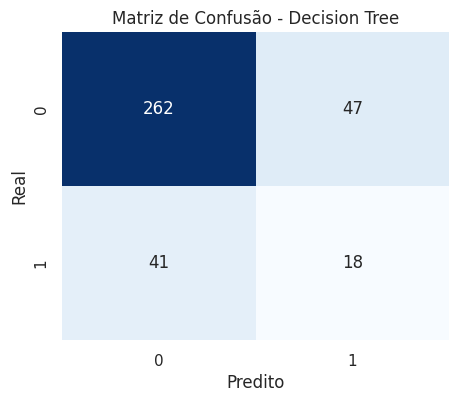

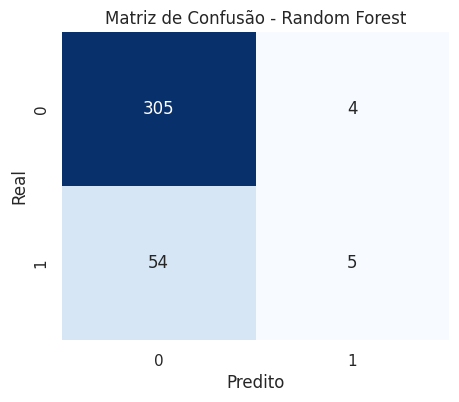

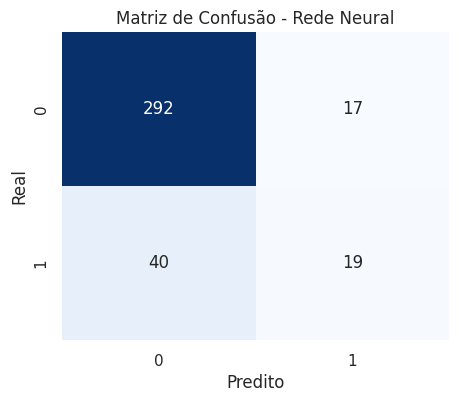

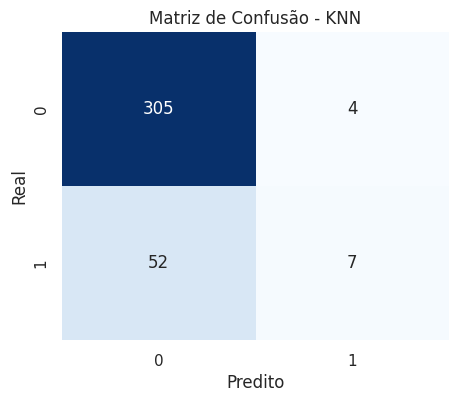

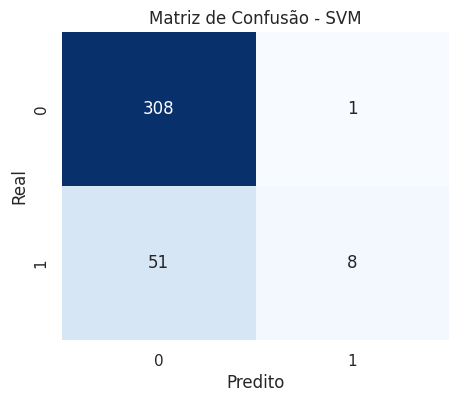

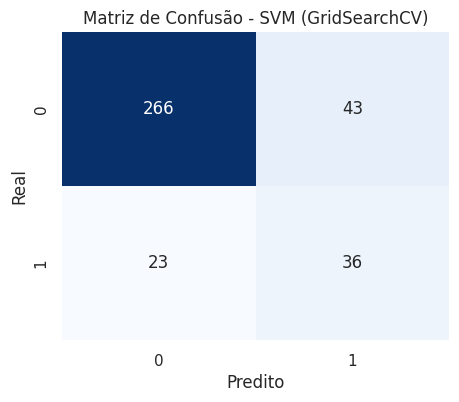

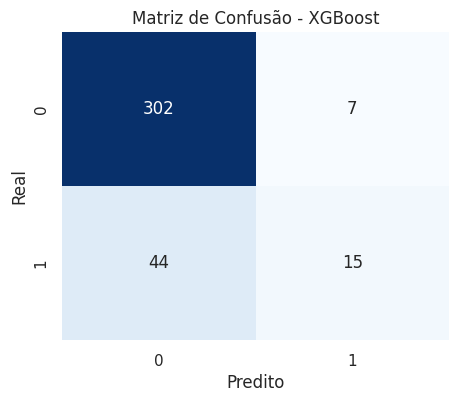

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# -------------------------------
# 1. Tabela Comparativa de Acurácia
# -------------------------------
accuracies = {
    'Regressão Logística': acc_log,
    'Árvore de Decisão': accuracy_score(y_test, y_pred_tree),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xgb),
    'KNN': accuracy_score(y_test, y_pred_knn),
    'SVM': accuracy_score(y_test, y_pred_svm),
    'SVM (GridSearchCV)': accuracy_score(y_test, y_pred_best_svm),  # y_pred do best_svm
    'Rede Neural': accuracy_score(y_test, y_pred_nn_bin)       # y_pred_bin = (y_pred >= 0.5)
}

print("Acurácia dos modelos:")
for model, acc in accuracies.items():
    print(f"{model}: {acc:.4f}")

# Melhor Acuracia
best_model = max(accuracies, key=accuracies.get)
print(f"\nO melhor modelo com maior acurácia é: {best_model} com valor: {accuracies[best_model]:.4f}")

# -------------------------------
# 2. Comparação Visual: Curva ROC
# -------------------------------

aucs = {
    'Regressão Logística': auc_log,
    'Árvore de Decisão': auc_tree,
    'Random Forest': auc_rf,
    'XGBoost': auc_xgb,
    'KNN': auc_knn,
    'SVM': auc_svm,
    'SVM (GridSearchCV)': auc_best_svm,
    'Rede Neural': auc_nn
}

plt.figure(figsize=(10, 8))

plt.plot(fpr_log, tpr_log, label=f'Logística (AUC = {auc_log:.2f})')

plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')

plt.plot(fpr_best_svm, tpr_best_svm, label=f'SVM Ajustado (AUC = {auc_best_svm:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Rede Neural (AUC = {auc_nn:.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Comparação das Curvas ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Melhor Modelo por AUC
max_auc = max(aucs, key=aucs.get)
print("\nAUC dos modelos:")
for model, auc in aucs.items():
    print(f"{model}: {auc:.4f}")

print(f"\nO modelo com a maior AUC é: {max_auc} com AUC de {aucs[max_auc]:.4f}")




# -------------------------------
# 3. Matriz de Confusão dos Modelos
# -------------------------------
modelos_cm = {
    'Regressão Logística': cm_log,
    'Decision Tree': cm_tree,
    'Random Forest': cm_rf,
    'Rede Neural': cm_nn,
    'KNN': cm_knn,
    'SVM': cm_svm,
    'SVM (GridSearchCV)': cm_best_svm,
    'XGBoost': cm_xgb
}

for nome_modelo, matriz in modelos_cm.items():
    plt.figure(figsize=(5, 4))
    sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()


## 💾 Salvar e Reutilizar o Modelo Treinado

Após treinar e validar os modelos, é fundamental garantir sua reutilização futura sem a necessidade de reexecutar todo o pipeline. Isso é especialmente útil para aplicações práticas como APIs, dashboards e sistemas de recomendação em produção.

Nesta etapa, salvamos três componentes essenciais:

- `MinMaxScaler`: responsável pela normalização dos dados numéricos;
- `OneHotEncoder`: usado para codificação das variáveis categóricas;
- `Modelo Treinado`: neste caso, a Regressão Logística.

Utilizaremos o módulo `pickle` para salvar e recarregar esses objetos.


In [ ]:
# --- 📦 Salvando o modelo e transformadores ---

import pickle

with open('modelo_treinado.pkl', 'wb') as arquivo_modelo:
    pickle.dump([scaler, onehotencoder, log_model], arquivo_modelo)


### 🔁 Carregando o modelo para uso posterior


In [ ]:
# --- 🔄 Recarregando o modelo e os transformadores ---

with open('modelo_treinado.pkl', 'rb') as arquivo_modelo:
    min_max, encoder, modelo = pickle.load(arquivo_modelo)

# Verificação rápida
min_max, encoder, modelo


(MinMaxScaler(), OneHotEncoder(), LogisticRegression(max_iter=1000))

### 🔍 Previsão para Novos Funcionários

A seguir, simulamos uma nova entrada usando a **primeira linha** do DataFrame original. O objetivo é verificar se esse colaborador tem maior probabilidade de deixar a empresa.


### --- 🧪 Seleção de um novo exemplo para previsão ---

In [ ]:
import pandas as pd

# --- 🧪 Seleção de um novo exemplo para previsão ---
X_novo = employee_df.iloc[[0]]  # Simulação de um novo funcionário

# --- ✂️ Separação das variáveis categóricas e numéricas ---
variaveis_categoricas = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
variaveis_numericas = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',
                       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
                       'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
                       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
                       'PerformanceRating', 'RelationshipSatisfaction',
                       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
                       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
                       'YearsSinceLastPromotion', 'YearsWithCurrManager']

X_cat_novo = X_novo[variaveis_categoricas]
X_num_novo = X_novo[variaveis_numericas]


### --- 🔣 Aplicação do encoder nos dados categóricos ---

In [ ]:
# --- 🔣 Aplicação do encoder nos dados categóricos ---
X_cat_encoded = encoder.transform(X_cat_novo)
X_cat_encoded_df = pd.DataFrame(X_cat_encoded.toarray(), columns=encoder.get_feature_names_out(variaveis_categoricas))


### --- 🧩 Combinação e padronização dos dados ---

In [ ]:
# --- 🧩 Combinação e padronização dos dados ---
X_all_novo = pd.concat([X_cat_encoded_df.reset_index(drop=True), X_num_novo.reset_index(drop=True)], axis=1)
X_padronizado = min_max.transform(X_all_novo)


### --- 🤖 Previsão com o modelo carregado ---

In [ ]:
# --- 🤖 Previsão com o modelo carregado ---
previsao = modelo.predict(X_padronizado)
probabilidade = modelo.predict_proba(X_padronizado)

print(f"Previsão para o novo funcionário: {'1 - Sai da empresa' if previsao[0] == 1 else '0 - Permanece'}")
print(f"Probabilidade - Permanecer: {probabilidade[0][0]:.2f} | Sair: {probabilidade[0][1]:.2f}")


Previsão para o novo funcionário: 1 - Sai da empresa
Probabilidade - Permanecer: 0.34 | Sair: 0.66
